In [9]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
!pip install pingouin

  Using cached pingouin-0.5.5-py3-none-any.whl.metadata (19 kB)
Using cached pingouin-0.5.5-py3-none-any.whl (204 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


/var/folders/_j/0jj4c7rn493fwtp5zhsdxbwc0000gn/T/ipykernel_16172/4215993626.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  subject_info['GroupData'] = subject_info['GroupData'].replace(label_mapping)


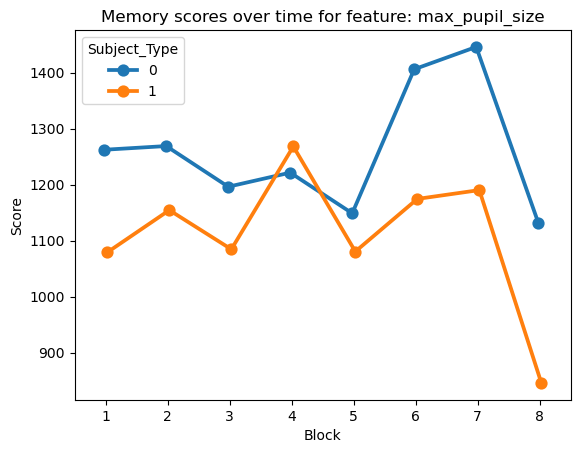

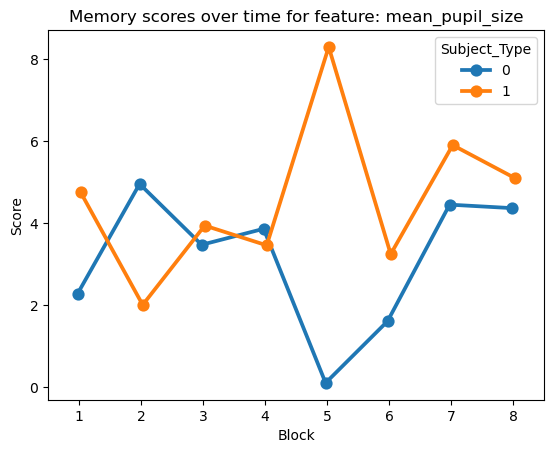

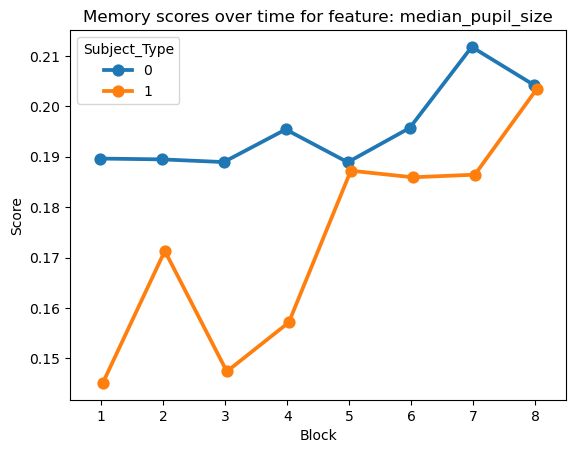

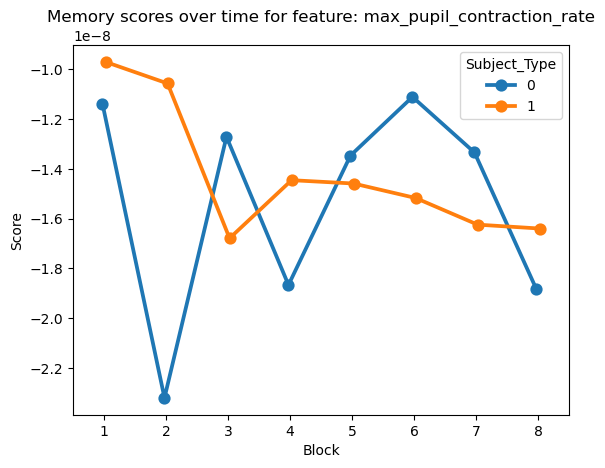

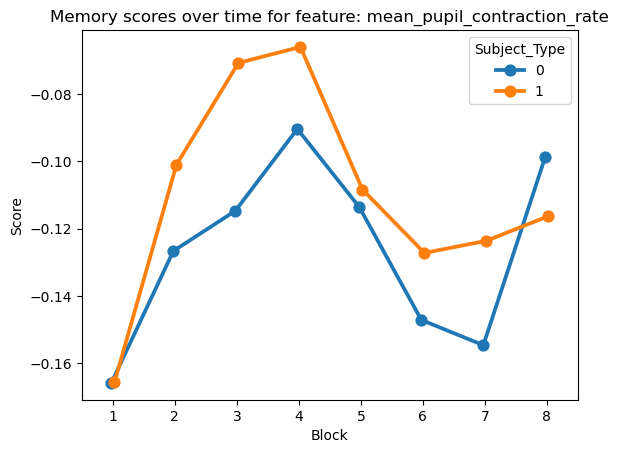

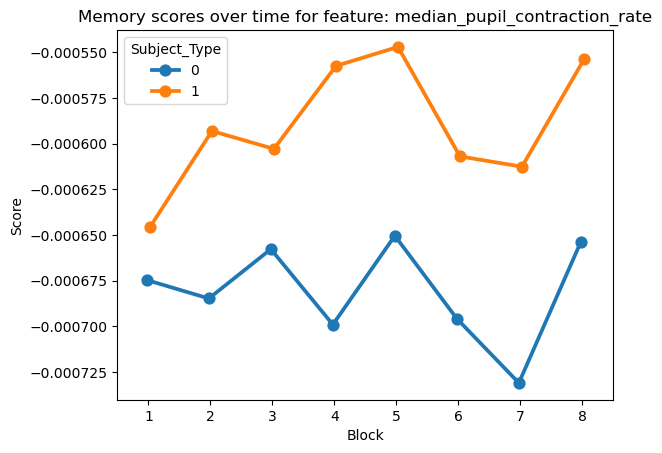

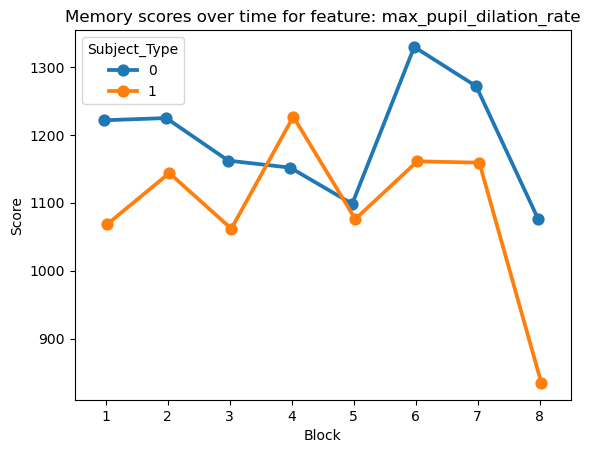

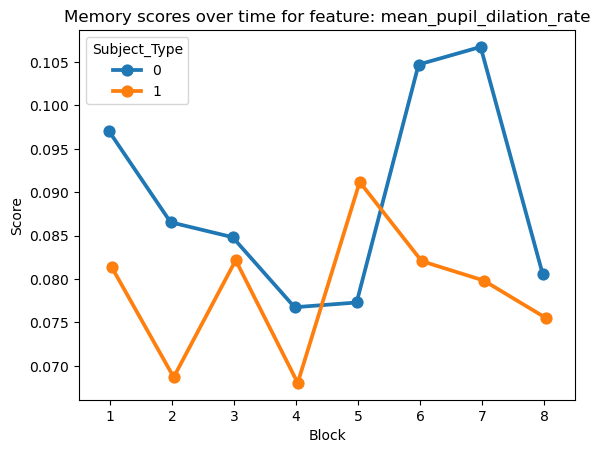

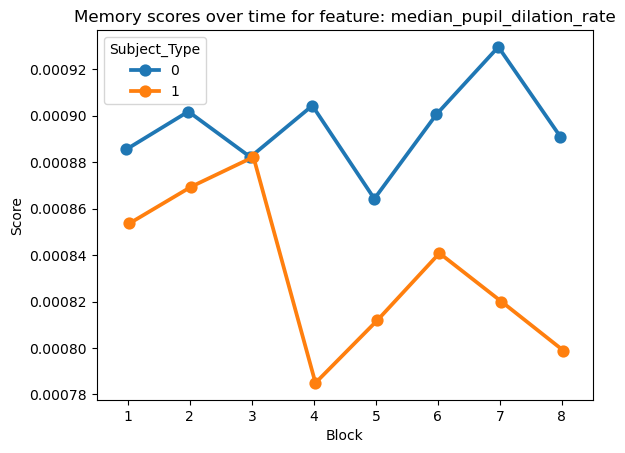

In [2]:
import pandas as pd
import pingouin as pg
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns
import matplotlib.pyplot as plt

# List of feature file names
features = [
    'max_pupil_size', 'mean_pupil_size', 'median_pupil_size',
    'max_pupil_contraction_rate', 'mean_pupil_contraction_rate', 'median_pupil_contraction_rate',
    'max_pupil_dilation_rate', 'mean_pupil_dilation_rate', 'median_pupil_dilation_rate'
]

subject_info = pd.read_csv('../../Full_dataset/Subject_info.csv')

# Group label mapping
label_mapping = {
    'off-ADHD': 0,
    'on-ADHD': 0,
    'Ctrl': 1
}
subject_info['GroupData'] = subject_info['GroupData'].replace(label_mapping)
label = subject_info['GroupData']

# Initialize an empty list to store each feature's data
dataframes = []

for feature in features:
    # Load each feature's data
    df = pd.read_csv(f"../../Block_wise/Full_Dataset/All_values/{feature}_data.csv", index_col=0)
    # if(feature in ['max_reaction_time', 'mean_reaction_time', 'median_reaction_time']):
    #     df = df.cumsum(axis=1)
    df.columns = [f"{i+1}" for i in range(df.shape[1])]  # Rename columns for blocks
    df["Subject"] = [f"{i}" for i in range(1, 68)]  # Assign subject number
    df["Subject_Type"] = label  # Use pre-mapped labels for subject types
    df["Feature"] = feature  # Assign feature name

    df = df.dropna()
    # Reshape data for plotting
    data_melted = pd.melt(df, id_vars=["Subject", "Subject_Type", "Feature"], var_name="Block", value_name="Score")
    
    # Plot for each feature
    sns.pointplot(data=data_melted, x='Block', y='Score', hue='Subject_Type', dodge=True, capsize=.1, errorbar=None)
    plt.title(f'Memory scores over time for feature: {feature}')
    plt.show()
    
    # Append to list
    dataframes.append(df)

# Combine all features into one DataFrame
data = pd.concat(dataframes, ignore_index=True)

In [3]:
import numpy as np
import pandas as pd
import os

# List of feature file names
features = [
    'max_pupil_size', 'mean_pupil_size', 'median_pupil_size',
    'max_pupil_contraction_rate', 'mean_pupil_contraction_rate', 'median_pupil_contraction_rate',
    'max_pupil_dilation_rate', 'mean_pupil_dilation_rate', 'median_pupil_dilation_rate'
]

subject_info = pd.read_csv('../../Full_dataset/Subject_info.csv')

# Group label mapping
label_mapping = {
    'off-ADHD': 0,
    'on-ADHD': 0,
    'Ctrl': 1
}
subject_info['GroupData'] = subject_info['GroupData'].replace(label_mapping)
label = subject_info['GroupData']

# Initialize an empty list to store each feature's data
anova_results = []

for feature in features:
    # Load each feature's data
    df = pd.read_csv(f"../../Block_wise/Full_Dataset/All_values/{feature}_data.csv", index_col=0)
    # if(feature in ['max_reaction_time', 'mean_reaction_time', 'median_reaction_time']):
    #     df = df.cumsum(axis=1)
    df.columns = [f"{i+1}" for i in range(df.shape[1])]  # Rename columns for blocks
    df["Subject"] = [f"{i}" for i in range(1, 68)]  # Assign subject number
    df["Subject_Type"] = label  # Use pre-mapped labels for subject types
    df["Feature"] = feature  # Assign feature name
    
    df = df.replace([np.inf, -np.inf], np.nan).dropna()
    # Reshape data for plotting
    data_melted = pd.melt(df, id_vars=["Subject", "Subject_Type", "Feature"], var_name="Block", value_name="Score")
    
    anova = pg.mixed_anova(
        data=data_melted,
        dv="Score",               # Dependent variable
        within="Block",            # Within-subject factor (Block)
        between="Subject_Type",    # Between-subject factor (Subject Type)
        subject="Subject"          # Subject identifier
    )
    
    # Add the feature name to the result for identification and append to results list
    anova["Feature"] = feature
    anova_results.append(anova)
    # Append to list
    dataframes.append(df)

# Combine all features into one DataFrame
data = pd.concat(dataframes, ignore_index=True)
anova_summary = pd.concat(anova_results, ignore_index=True)
anova_summary_file = os.path.join("../Data/", "Mixed_anova_results_[full_dataset][without_behavioural][2_class].csv")
anova_summary.to_csv(anova_summary_file, index=False)
print(f"Saved ANOVA summary to {anova_summary_file}")

Saved ANOVA summary to ../Data/Mixed_anova_results_[full_dataset][without_behavioural][2_class].csv


/var/folders/_j/0jj4c7rn493fwtp5zhsdxbwc0000gn/T/ipykernel_16172/3078558073.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  subject_info['GroupData'] = subject_info['GroupData'].replace(label_mapping)
/opt/anaconda3/lib/python3.12/site-packages/pingouin/distribution.py:1004: RuntimeWarning: divide by zero encountered in scalar divide
  W = np.prod(eig) / (eig.sum() / d) ** d
/opt/anaconda3/lib/python3.12/site-packages/pingouin/distribution.py:1004: RuntimeWarning: divide by zero encountered in scalar divide
  W = np.prod(eig) / (eig.sum() / d) ** d
/opt/anaconda3/lib/python3.12/site-packages/pingouin/distribution.py:1004: RuntimeWarning: divide by zero encountered in scalar divide
  W = np.prod(eig) / (eig.sum() / d) ** d


In [4]:
import pandas as pd
import pingouin as pg
import numpy as np

# List of feature file names
features = [
    'max_pupil_size', 'mean_pupil_size', 'median_pupil_size',
    'max_pupil_contraction_rate', 'mean_pupil_contraction_rate', 'median_pupil_contraction_rate',
    'max_pupil_dilation_rate', 'mean_pupil_dilation_rate', 'median_pupil_dilation_rate'
]

# Load subject information and map groups
subject_info = pd.read_csv('../../Full_dataset/Subject_info.csv')
label_mapping = {'off-ADHD': 0, 'on-ADHD': 0, 'Ctrl': 1}
subject_info['GroupData'] = subject_info['GroupData'].replace(label_mapping).astype(int)
label = subject_info['GroupData']

# Initialize a list to store post hoc results
posthoc_results = []

for feature in features:
    # Load each feature's data
    df = pd.read_csv(f"../../Block_wise/Full_Dataset/All_values/{feature}_data.csv", index_col=0)
    
    # if(feature in ['max_reaction_time', 'mean_reaction_time', 'median_reaction_time']):
    #     df = df.cumsum(axis=1)
        
    # Rename columns for blocks and add metadata columns
    df.columns = [f"{i+1}" for i in range(df.shape[1])]
    df["Subject"] = [f"{i}" for i in range(1, 68)]
    df["Subject_Type"] = label
    df["Feature"] = feature

    # Drop rows with NaN or infinite values to avoid issues in calculations
    df = df.replace([np.inf, -np.inf], np.nan).dropna()
    
    # Reshape data for mixed ANOVA
    data_melted = pd.melt(df, id_vars=["Subject", "Subject_Type", "Feature"], var_name="Block", value_name="Score")

    # Ensure the reshaped data contains no NaN or inf values in 'Score'
    data_melted = data_melted.dropna(subset=['Score'])

    # Skip if there are insufficient or identical data points
    if data_melted['Score'].nunique() <= 1:
        print(f"Insufficient or identical data points for feature: {feature}")
        continue
    
    try:
        # Perform post hoc pairwise tests for all comparisons
        posthoc = pg.pairwise_tests(
            data=data_melted,
            dv="Score",
            between="Subject_Type",  # between-subjects factor
            within="Block",           # within-subjects factor
            subject="Subject",
            padjust="bonf"            # Bonferroni adjustment for multiple comparisons
        )
        
        # Add the feature name to post hoc results and append
        posthoc["Feature"] = feature
        posthoc_results.append(posthoc)
        
    except np.linalg.LinAlgError:
        print(f"Numerical instability for feature: {feature}. Skipping.")
    except ValueError as e:
        print(f"ValueError for feature {feature}: {e}")

# Combine all features' post hoc results into one DataFrame
posthoc_summary = pd.concat(posthoc_results, ignore_index=True)
posthoc_summary_file = os.path.join("../Data/", "Post_Hoc_results_[full_dataset][without_behavioural][2_class].csv")
posthoc_summary.to_csv(posthoc_summary_file, index=False)

print("Post hoc analysis completed for all features.")

/var/folders/_j/0jj4c7rn493fwtp5zhsdxbwc0000gn/T/ipykernel_16172/1841329013.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  subject_info['GroupData'] = subject_info['GroupData'].replace(label_mapping).astype(int)


Post hoc analysis completed for all features.


In [16]:
import pandas as pd

# Load the post hoc results CSV file
file_path = '../Data/Post_Hoc_results_[full_dataset][without_behavioural][2_class].csv'
posthoc_summary = pd.read_csv(file_path)

# Filter for significant results (p-corr < 0.05)
significant_results = posthoc_summary[posthoc_summary["p-corr"] < 0.05]

# Check if there are any significant results
if not significant_results.empty:
    # Create a structured table for key aspects
    results_table = significant_results[[
        "Feature", "Contrast", "A", "B", "T", "dof", "p-corr", "hedges", "BF10"
    ]].copy()
    
    # Rename columns for easier reading
    results_table.columns = [
        "Feature", "Comparison Type", "Level A", "Level B", 
        "T-Value", "Degrees of Freedom", "Corrected p-value", 
        "Effect Size (Hedges' g)", "Bayes Factor (BF10)"
    ]
    
    # Optionally, save to CSV
    results_table.to_csv("../Data/Significant_Post_Hoc_Results[full_dataset][without_behavioural][2 class].csv", index=False)
else:
    print("No statistically significant post hoc results found (p-corr < 0.05).")

In [17]:
import numpy as np
import pandas as pd
import pingouin as pg

# List of feature file names
features = [
    'max_pupil_size', 'mean_pupil_size', 'median_pupil_size',
    'max_pupil_contraction_rate', 'mean_pupil_contraction_rate', 'median_pupil_contraction_rate',
    'max_pupil_dilation_rate', 'mean_pupil_dilation_rate', 'median_pupil_dilation_rate'
]

# Load subject info and map group labels
subject_info = pd.read_csv('../../Full_dataset/Subject_info.csv')
label_mapping = {'off-ADHD': 0, 'on-ADHD': 0, 'Ctrl': 1}
subject_info['GroupData'] = subject_info['GroupData'].replace(label_mapping)
label = subject_info['GroupData']

# Initialize lists to store ANOVA results and individual feature data
anova_results = []
all_blocks_significance = {}
dataframes = []

for feature in features:
    # Load and preprocess each feature's data
    df = pd.read_csv(f"../../Block_wise/Full_Dataset/All_values/{feature}_data.csv", index_col=0)
    # if(feature in ['max_reaction_time', 'mean_reaction_time', 'median_reaction_time']):
    #     df = df.cumsum(axis=1)
    df.columns = [f"{i+1}" for i in range(df.shape[1])]  # Rename columns for blocks
    df["Subject"] = [f"{i}" for i in range(1, 68)]  # Assign subject numbers
    df["Subject_Type"] = label  # Assign group labels
    df["Feature"] = feature  # Label the feature name

    # Replace infinite values and drop rows with NaNs
    df = df.replace([np.inf, -np.inf], np.nan).dropna()
    
    # Melt the data to long format for mixed ANOVA
    data_melted = pd.melt(df, id_vars=["Subject", "Subject_Type", "Feature"], var_name="Block", value_name="Score")
    
    # Perform mixed ANOVA on the melted data
    anova = pg.mixed_anova(
        data=data_melted,
        dv="Score",               # Dependent variable
        within="Block",            # Within-subject factor (Block)
        between="Subject_Type",    # Between-subject factor (Subject Type)
        subject="Subject"          # Subject identifier
    )
    
    # Add feature name to ANOVA result for identification
    anova["Feature"] = feature
    anova_results.append(anova)

    # Check each block individually and store all p-values
    blocks = sorted(data_melted['Block'].unique(), key=int)
    block_significance = []  # To store block and p-value for each feature
    
    for block in blocks:
        # Filter data for the current block
        block_data = data_melted[data_melted['Block'] == block]
        
        # Run ANOVA for the current block
        model = pg.anova(data=block_data, dv="Score", between="Subject_Type")
        
        # Get the p-value for the group difference (Subject_Type)
        p_value = model.loc[model['Source'] == 'Subject_Type', 'p-unc'].values[0]
        
        # Store the block and p-value
        block_significance.append((block, p_value))
    
    # Store results for each feature
    all_blocks_significance[feature] = block_significance
    dataframes.append(df)  # Store the feature data for further analysis or visualization

# Print all blocks and their significance for each feature
print("\nSignificance of each block for every feature:")
for feature, blocks in all_blocks_significance.items():
    print(f"\nFeature: {feature}")
    for block, p_value in blocks:
        significance = "Significant" if p_value < 0.05 else "Not Significant"
        if(significance == "Significant"):
            print(f"  Block {block}: p-value = {p_value:.4f} ({significance})")


/var/folders/_j/0jj4c7rn493fwtp5zhsdxbwc0000gn/T/ipykernel_1588/2566868129.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  subject_info['GroupData'] = subject_info['GroupData'].replace(label_mapping)
/opt/anaconda3/lib/python3.12/site-packages/pingouin/distribution.py:1004: RuntimeWarning: divide by zero encountered in scalar divide
  W = np.prod(eig) / (eig.sum() / d) ** d
/opt/anaconda3/lib/python3.12/site-packages/pingouin/distribution.py:1004: RuntimeWarning: divide by zero encountered in scalar divide
  W = np.prod(eig) / (eig.sum() / d) ** d



Significance of each block for every feature:

Feature: max_pupil_size

Feature: mean_pupil_size

Feature: median_pupil_size
  Block 1: p-value = 0.0150 (Significant)
  Block 3: p-value = 0.0415 (Significant)

Feature: max_pupil_contraction_rate
  Block 2: p-value = 0.0235 (Significant)

Feature: mean_pupil_contraction_rate

Feature: median_pupil_contraction_rate
  Block 4: p-value = 0.0275 (Significant)
  Block 8: p-value = 0.0398 (Significant)

Feature: max_pupil_dilation_rate

Feature: mean_pupil_dilation_rate

Feature: median_pupil_dilation_rate
  Block 4: p-value = 0.0329 (Significant)
  Block 8: p-value = 0.0356 (Significant)


/opt/anaconda3/lib/python3.12/site-packages/pingouin/distribution.py:1004: RuntimeWarning: divide by zero encountered in scalar divide
  W = np.prod(eig) / (eig.sum() / d) ** d


In [18]:
import numpy as np
import pandas as pd
import pingouin as pg

# List of feature file names
features = [
    'max_pupil_size', 'mean_pupil_size', 'median_pupil_size',
    'max_pupil_contraction_rate', 'mean_pupil_contraction_rate', 'median_pupil_contraction_rate',
    'max_pupil_dilation_rate', 'mean_pupil_dilation_rate', 'median_pupil_dilation_rate'
]

# Load subject info and map group labels
subject_info = pd.read_csv('../../Full_dataset/Subject_info.csv')
label_mapping = {'off-ADHD': 0, 'on-ADHD': 0, 'Ctrl': 1}
subject_info['GroupData'] = subject_info['GroupData'].replace(label_mapping)
label = subject_info['GroupData']

# Initialize lists to store ANOVA results and individual feature data
anova_results = []
all_blocks_significance = {}
detailed_results = []  # To store detailed results for significant features
dataframes = []

for feature in features:
    # Load and preprocess each feature's data
    df = pd.read_csv(f"../../Block_wise/Full_Dataset/All_values/{feature}_data.csv", index_col=0)
    df.columns = [f"{i+1}" for i in range(df.shape[1])]  # Rename columns for blocks
    df["Subject"] = [f"{i}" for i in range(1, 68)]  # Assign subject numbers
    df["Subject_Type"] = label  # Assign group labels
    df["Feature"] = feature  # Label the feature name

    # Replace infinite values and drop rows with NaNs
    df = df.replace([np.inf, -np.inf], np.nan).dropna()
    
    # Melt the data to long format for mixed ANOVA
    data_melted = pd.melt(df, id_vars=["Subject", "Subject_Type", "Feature"], var_name="Block", value_name="Score")
    
    # Perform mixed ANOVA on the melted data
    anova = pg.mixed_anova(
        data=data_melted,
        dv="Score",               # Dependent variable
        within="Block",            # Within-subject factor (Block)
        between="Subject_Type",    # Between-subject factor (Subject Type)
        subject="Subject"          # Subject identifier
    )
    
    # Add degrees of freedom and effect size to the Mixed ANOVA results
    anova["Degrees_of_Freedom"] = anova.apply(lambda row: f"{row['DF1']},{row['DF2']}", axis=1)
    anova["Partial_Eta_Squared"] = anova["np2"]
    anova["Feature"] = feature
    anova_results.append(anova)

    # Check each block individually and store all p-values along with other metrics
    blocks = sorted(data_melted['Block'].unique(), key=int)
    block_significance = []  # To store block and p-value for each feature
    
    for block in blocks:
        # Filter data for the current block
        block_data = data_melted[data_melted['Block'] == block]
        
        # Run ANOVA for the current block
        model = pg.anova(data=block_data, dv="Score", between="Subject_Type")
        
        # Extract relevant statistics
        p_value = model.loc[model['Source'] == 'Subject_Type', 'p-unc'].values[0]
        f_value = model.loc[model['Source'] == 'Subject_Type', 'F'].values[0]
        df1 = model.loc[model['Source'] == 'Subject_Type', 'ddof1'].values[0]
        df2 = model.loc[model['Source'] == 'Subject_Type', 'ddof2'].values[0]
        effect_size = model.loc[model['Source'] == 'Subject_Type', 'np2'].values[0]  # Partial eta squared
        
        # Group-level statistics
        group_stats = block_data.groupby('Subject_Type')['Score']
        group_means = group_stats.mean().to_dict()
        group_std = group_stats.std().to_dict()
        mean_difference = group_means.get(1, 0) - group_means.get(0, 0)
        
        # Manually calculate confidence intervals for the mean difference
        ci_low = mean_difference - 1.96 * np.sqrt(group_std.get(1, 0)**2 / len(block_data[block_data['Subject_Type'] == 1]) +
                                                  group_std.get(0, 0)**2 / len(block_data[block_data['Subject_Type'] == 0]))
        ci_high = mean_difference + 1.96 * np.sqrt(group_std.get(1, 0)**2 / len(block_data[block_data['Subject_Type'] == 1]) +
                                                   group_std.get(0, 0)**2 / len(block_data[block_data['Subject_Type'] == 0]))

        # Store detailed results for significant blocks
        if p_value < 0.05:
            detailed_results.append({
                'Feature': feature,
                'Block': block,
                'p_value': p_value,
                'F_value': f_value,
                'Degrees_of_Freedom': f"{df1},{df2}",
                'Partial_Eta_Squared': effect_size,  # Explicitly labeled
                'ADHD_Mean': group_means.get(0, np.nan),
                'Control_Mean': group_means.get(1, np.nan),
                'Mean_Difference': mean_difference,
                'Confidence_Interval': f"[{ci_low:.3f}, {ci_high:.3f}]",
                'ADHD_Std': group_std.get(0, np.nan),
                'Control_Std': group_std.get(1, np.nan)
            })
        
        # Store the block and p-value
        block_significance.append((block, p_value))
    
    # Store results for each feature
    all_blocks_significance[feature] = block_significance
    dataframes.append(df)  # Store the feature data for further analysis or visualization

# Print detailed results for significant features
print("\nDetailed Results for Significant Features:")
detailed_results_df = pd.DataFrame(detailed_results)
print(detailed_results_df)

# # Save results to CSV for further analysis
# detailed_results_df.to_csv("enhanced_significant_features_analysis.csv", index=False)


/var/folders/_j/0jj4c7rn493fwtp5zhsdxbwc0000gn/T/ipykernel_1588/2626931828.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  subject_info['GroupData'] = subject_info['GroupData'].replace(label_mapping)
/opt/anaconda3/lib/python3.12/site-packages/pingouin/distribution.py:1004: RuntimeWarning: divide by zero encountered in scalar divide
  W = np.prod(eig) / (eig.sum() / d) ** d
/opt/anaconda3/lib/python3.12/site-packages/pingouin/distribution.py:1004: RuntimeWarning: divide by zero encountered in scalar divide
  W = np.prod(eig) / (eig.sum() / d) ** d



Detailed Results for Significant Features:
                         Feature Block   p_value   F_value Degrees_of_Freedom  \
0              median_pupil_size     1  0.015038  6.244195               1,64   
1              median_pupil_size     3  0.041519  4.327109               1,64   
2     max_pupil_contraction_rate     2  0.023463  5.388769               1,64   
3  median_pupil_contraction_rate     4  0.027470  5.091294               1,64   
4  median_pupil_contraction_rate     8  0.039808  4.403897               1,64   
5     median_pupil_dilation_rate     4  0.032869  4.756539               1,64   
6     median_pupil_dilation_rate     8  0.035568  4.610634               1,64   

   Partial_Eta_Squared     ADHD_Mean  Control_Mean  Mean_Difference  \
0             0.088893  1.896319e-01  1.451200e-01    -4.451195e-02   
1             0.063329  1.889371e-01  1.473863e-01    -4.155079e-02   
2             0.077661 -2.320737e-08 -1.056951e-08     1.263786e-08   
3             0.073689 

/opt/anaconda3/lib/python3.12/site-packages/pingouin/distribution.py:1004: RuntimeWarning: divide by zero encountered in scalar divide
  W = np.prod(eig) / (eig.sum() / d) ** d


In [7]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 4.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [20]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
significant_df = pd.read_csv("../Data/full_dataset_without_behavioural_[2_class].csv", index_col=0)
subject_info = pd.read_csv('../../Full_dataset/Subject_info.csv')

# Remove the 52nd row in the features dataset
subject_info = subject_info.drop(index=51).reset_index(drop=True)

# Map group labels to integers
label_mapping = {'off-ADHD': 0, 'on-ADHD': 0, 'Ctrl': 1}
subject_info['GroupData'] = subject_info['GroupData'].replace(label_mapping)

# Extract features and labels
labels = subject_info['GroupData']
assert len(significant_df) == len(labels), "Mismatch between features and labels."

/var/folders/_j/0jj4c7rn493fwtp5zhsdxbwc0000gn/T/ipykernel_1588/2015207590.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  subject_info['GroupData'] = subject_info['GroupData'].replace(label_mapping)


### 1. Histogram

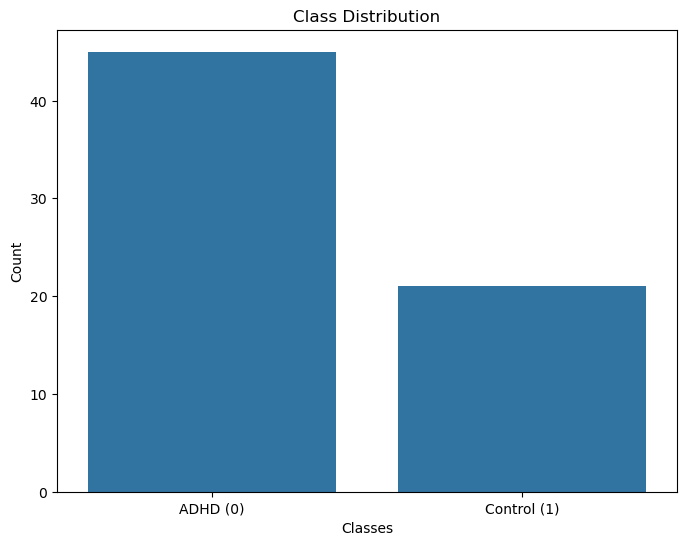

In [21]:
# Count plot for class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=labels)
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks([0, 1], ['ADHD (0)', 'Control (1)'])  # Adjust labels for readability
plt.show()


### 2. Class-wise Violin Plots for Numerical Features

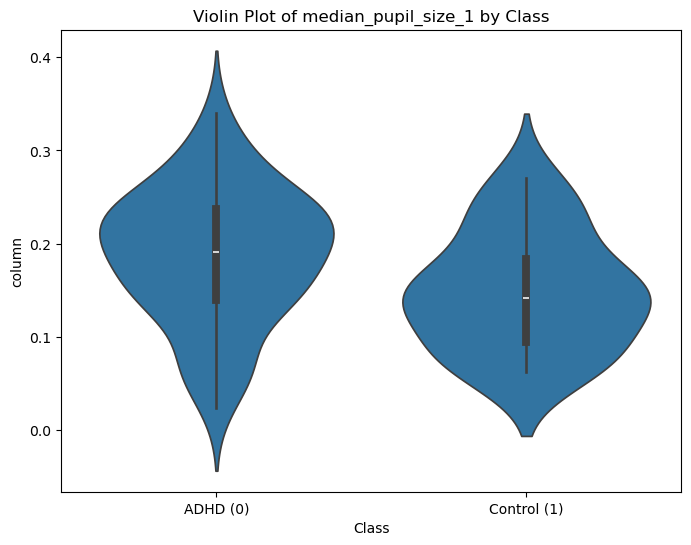

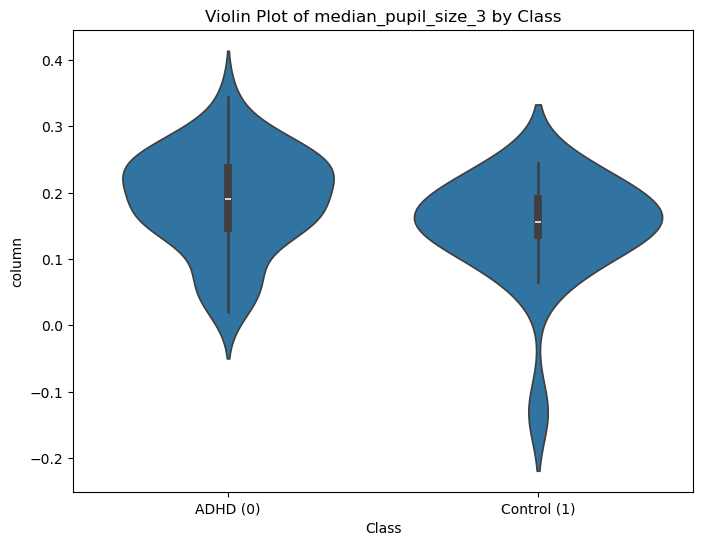

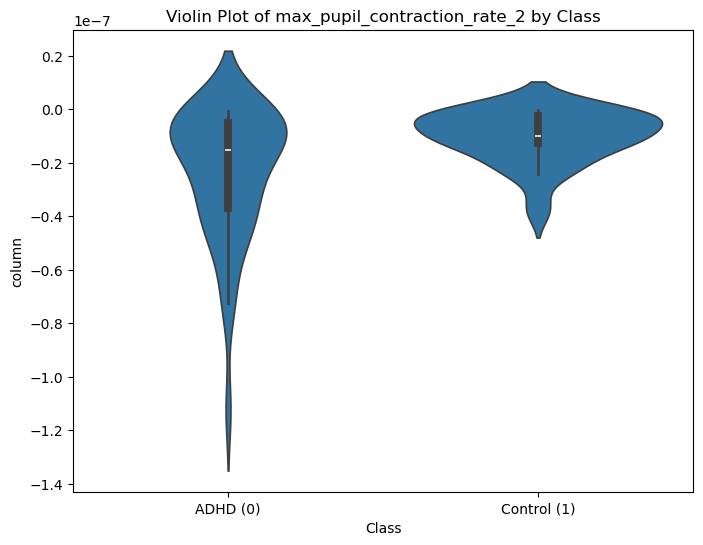

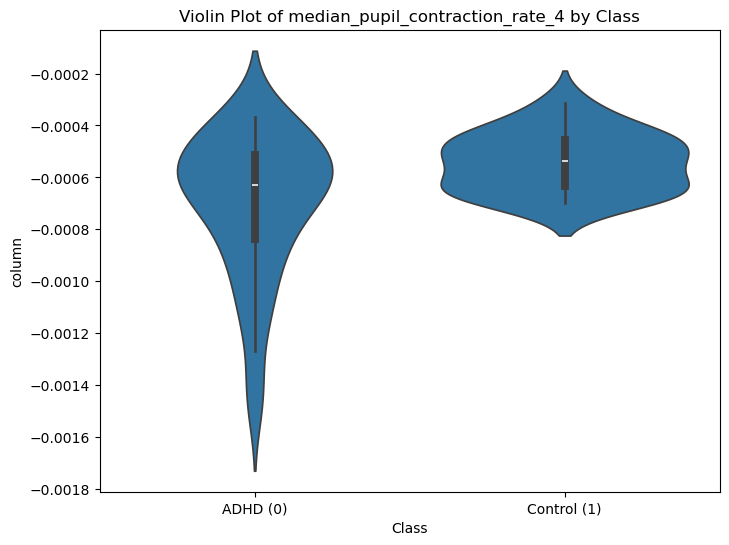

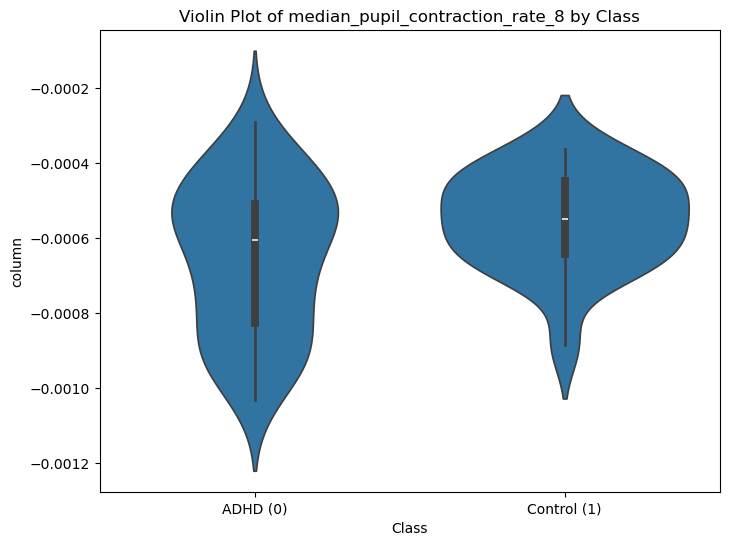

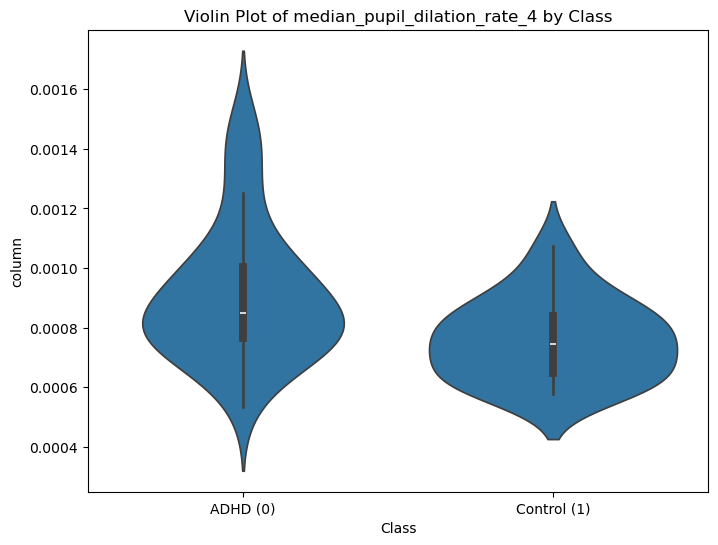

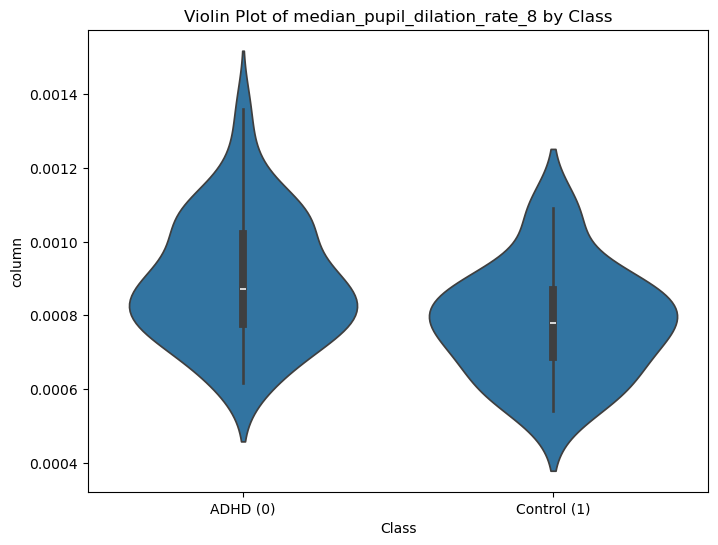

In [22]:
# Violin plots for each numerical feature grouped by class
numerical_columns = significant_df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=labels, y=significant_df[column])
    plt.title(f'Violin Plot of {column} by Class')
    plt.xlabel('Class')
    plt.ylabel(f'column')
    plt.xticks([0, 1], ['ADHD (0)', 'Control (1)'])
    plt.show()

### 3. Class-wise Box Plots for Numerical Features

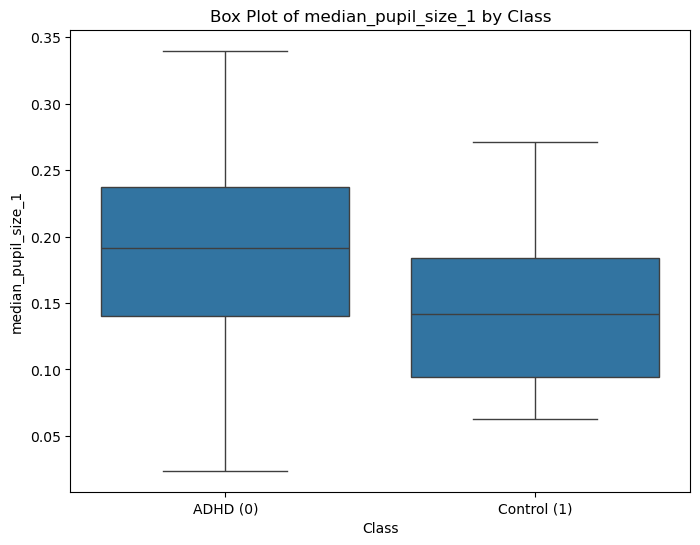

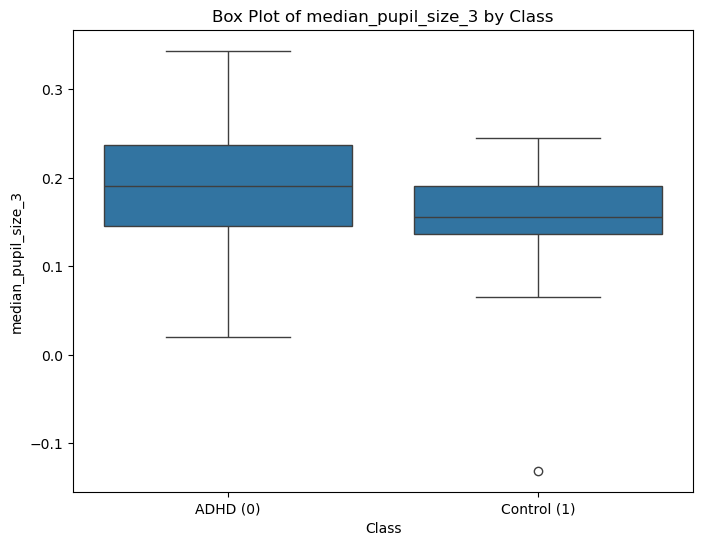

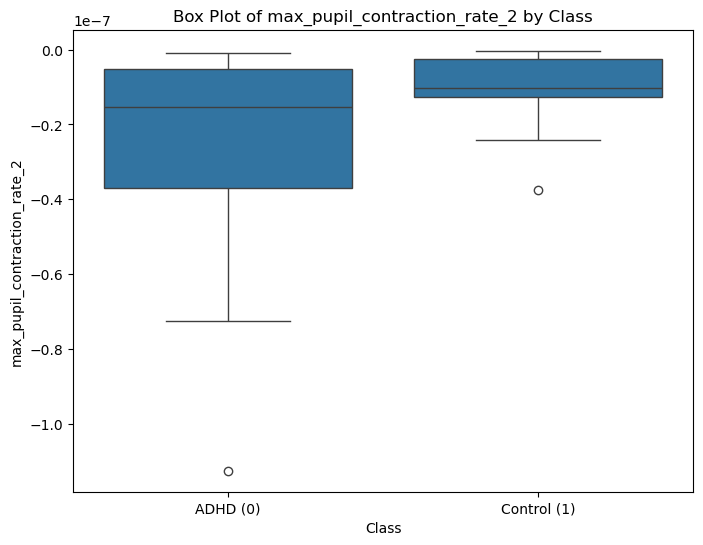

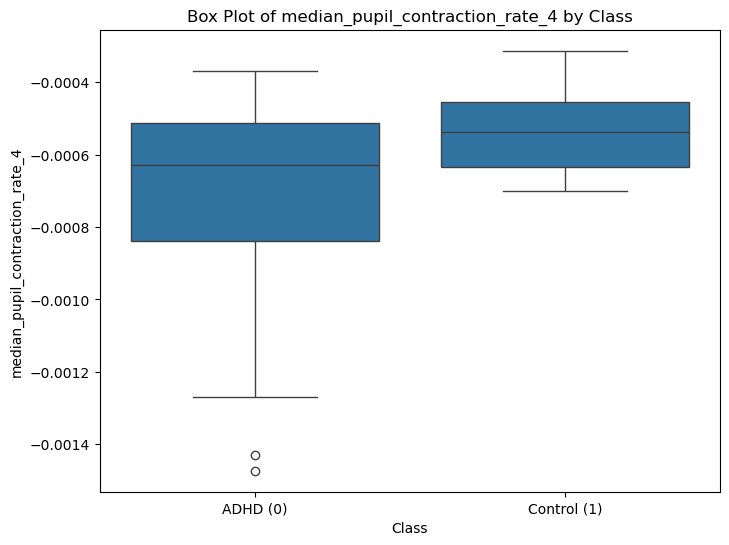

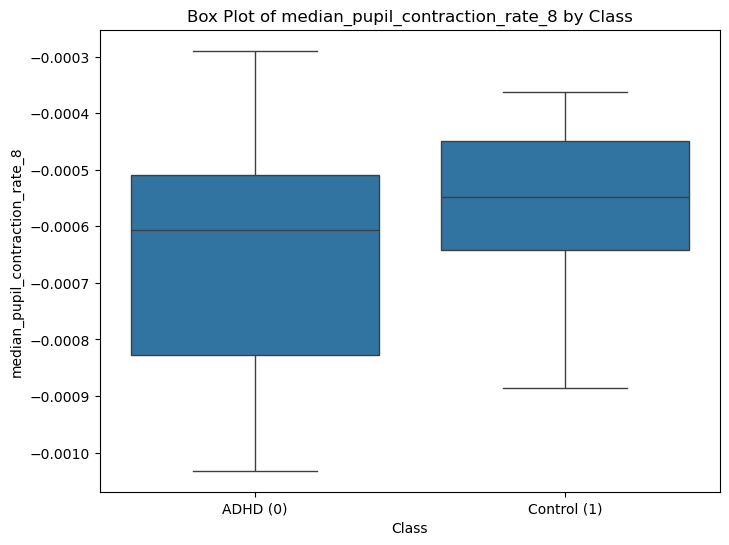

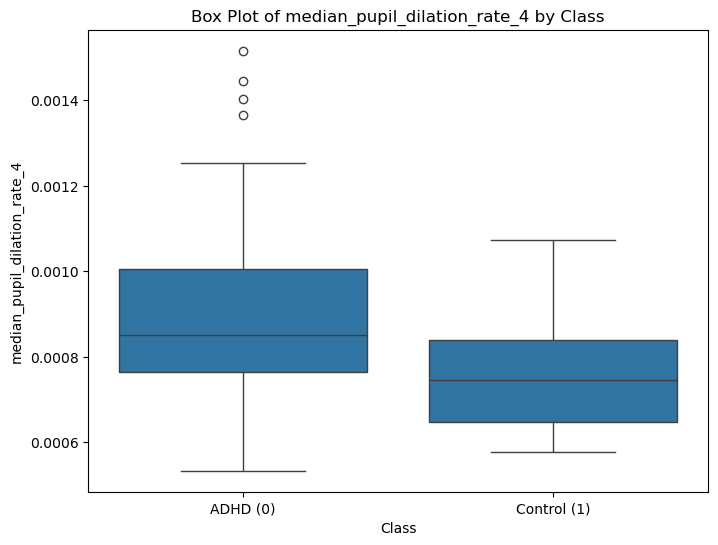

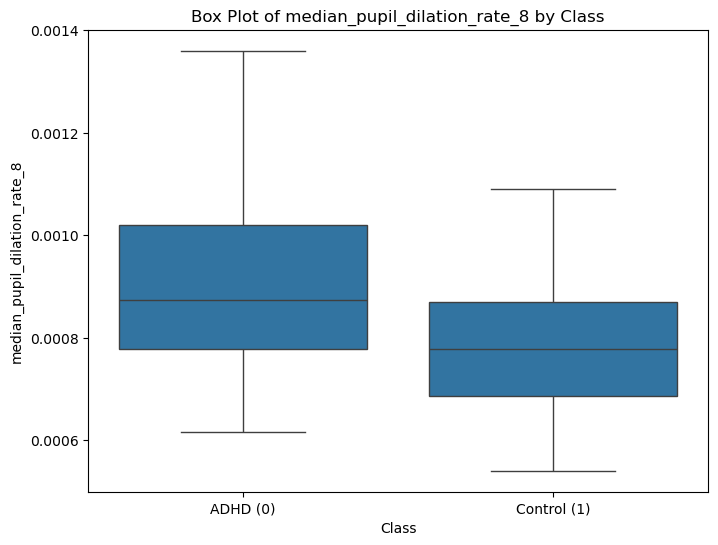

In [23]:
# Box plots for each numerical feature grouped by class
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=labels, y=significant_df[column])
    plt.title(f'Box Plot of {column} by Class')
    plt.xlabel('Class')
    plt.ylabel(column)
    plt.xticks([0, 1], ['ADHD (0)', 'Control (1)'])
    plt.show()


### 4. Correlation Heatmap for Each Class

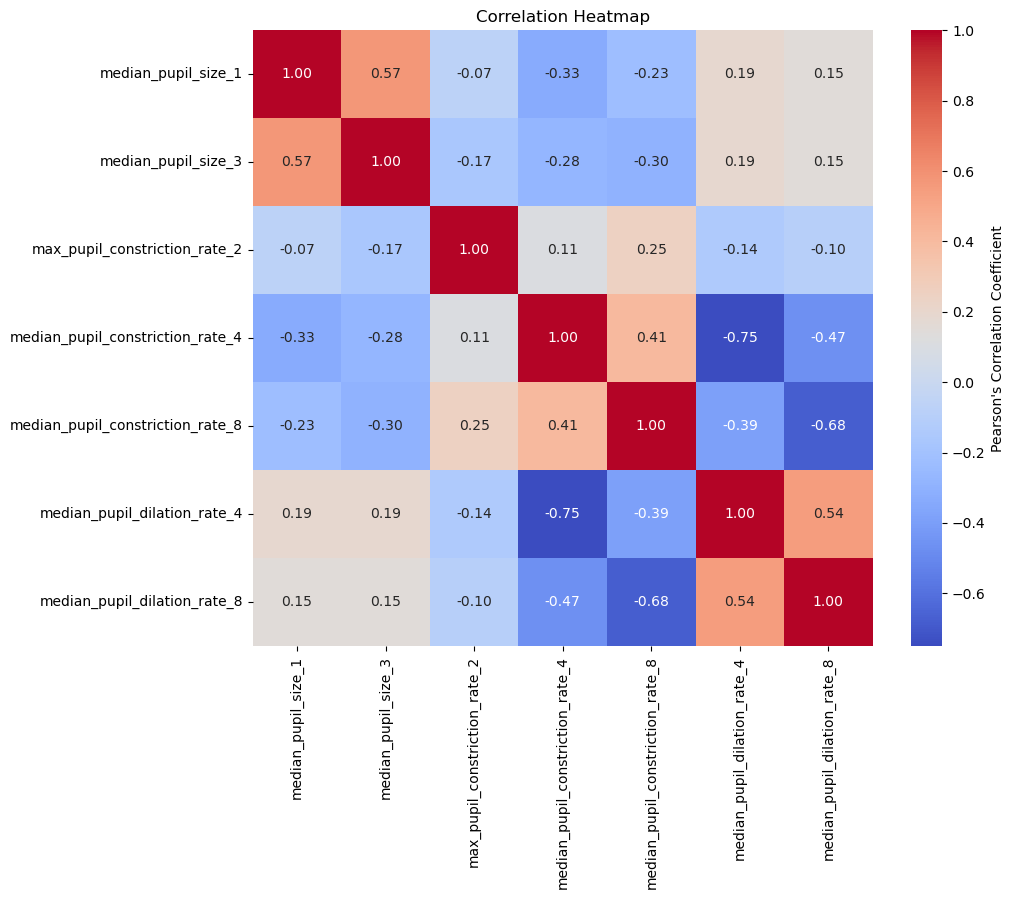

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg

# List of feature file names
features = [
    'max_pupil_size', 'mean_pupil_size', 'median_pupil_size',
    'max_pupil_constriction_rate', 'mean_pupil_constriction_rate', 'median_pupil_constriction_rate',
    'max_pupil_dilation_rate', 'mean_pupil_dilation_rate', 'median_pupil_dilation_rate'
]

# Load subject info and map group labels
subject_info = pd.read_csv('../../Full_dataset/Subject_info.csv')
label_mapping = {'off-ADHD': 0, 'on-ADHD': 0, 'Ctrl': 1}
subject_info['GroupData'] = subject_info['GroupData'].replace(label_mapping)
label = subject_info['GroupData']

# Assuming `significant_df` is a DataFrame containing the data for the features
# If `significant_df` is not defined, ensure it is created or loaded before plotting
# Example:
# significant_df = pd.DataFrame(data, columns=features)

plt.figure(figsize=(10, 8))

# Create a heatmap with proper colorbar settings
sns.heatmap(
    significant_df.corr(),
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar_kws={'label': "Pearson's Correlation Coefficient"}
)

plt.title('Correlation Heatmap')
plt.show()


### 5. Class-wise KDE Plot for Numerical Features

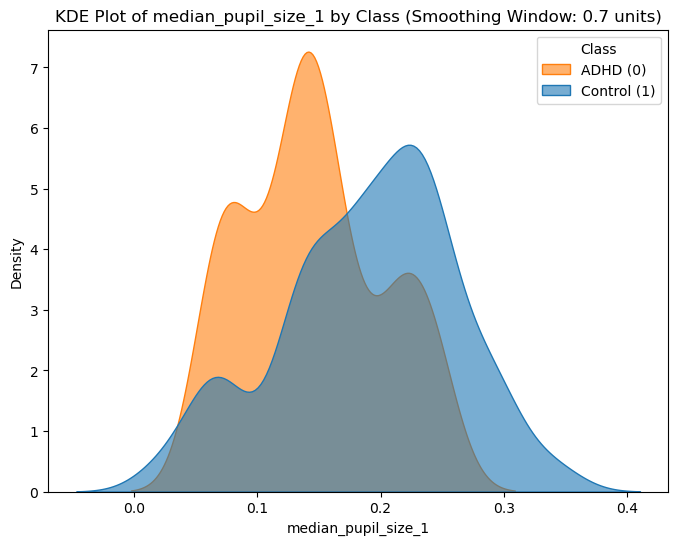

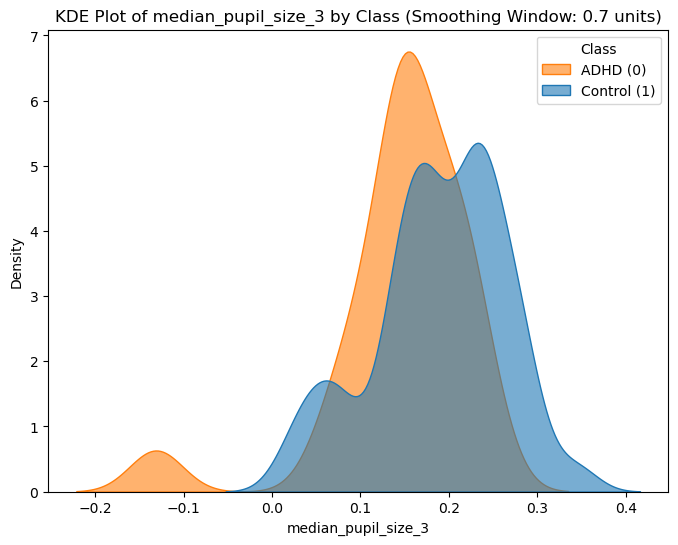

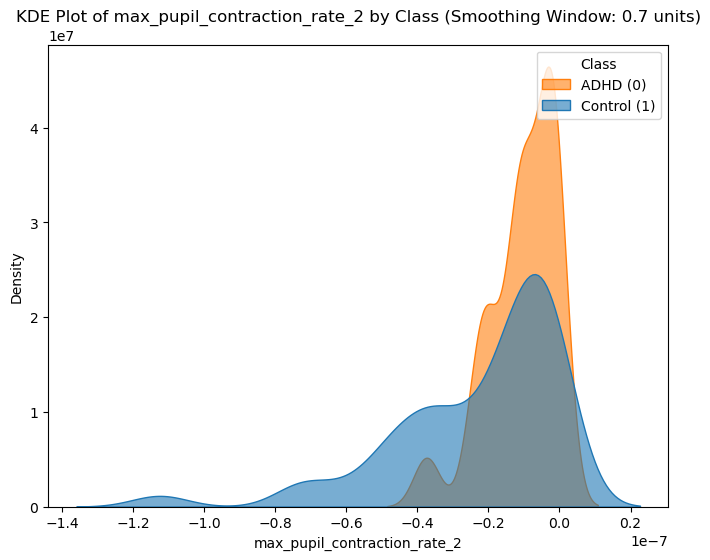

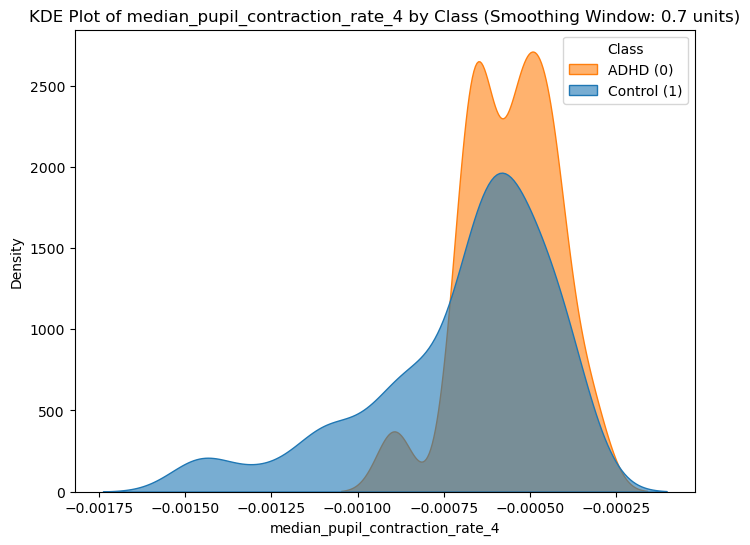

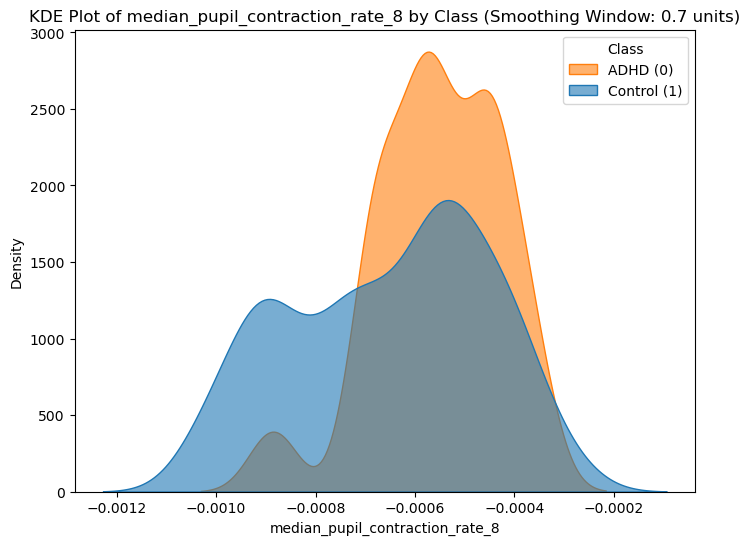

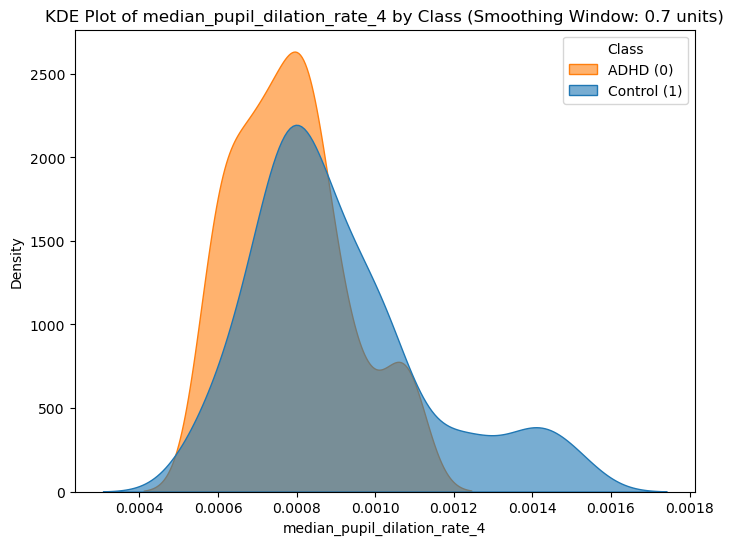

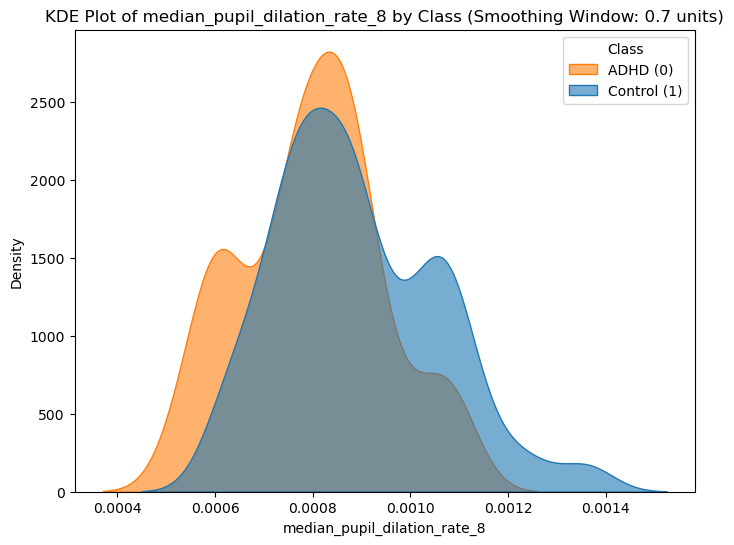

In [26]:
# KDE plots for numerical features grouped by class with smoothing window details
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    
    # Specify the bandwidth (smoothing window size) explicitly
    bandwidth = 0.7  # Set the bandwidth value here (adjust as necessary)
    
    sns.kdeplot(
        data=significant_df, 
        x=column, 
        hue=labels, 
        fill=True, 
        common_norm=False, 
        alpha=0.6,
        bw_adjust=bandwidth  # Adjust smoothing window
    )
    
    # Add title and labels
    plt.title(f'KDE Plot of {column} by Class (Smoothing Window: {bandwidth} units)')
    plt.xlabel(f'{column}')
    plt.ylabel('Density')
    plt.legend(title='Class', labels=['ADHD (0)', 'Control (1)'])
    plt.show()


## Models

## Traditional ML Models

Testing model: LogisticRegression
Testing model: RandomForest
Testing model: SVC
Testing model: KNeighbors
Testing model: GradientBoosting
Testing model: XGBoost

Best Model: SVC
Best Parameters: {'C': 10, 'kernel': 'rbf', 'gamma': 'auto'}
Best Cross-Validation Accuracy: 0.8333

Confusion Matrix:
[[33 12]
 [ 3 42]]

Classification Report:
               precision    recall  f1-score   support

        ADHD       0.92      0.73      0.81        45
        Ctrl       0.78      0.93      0.85        45

    accuracy                           0.83        90
   macro avg       0.85      0.83      0.83        90
weighted avg       0.85      0.83      0.83        90



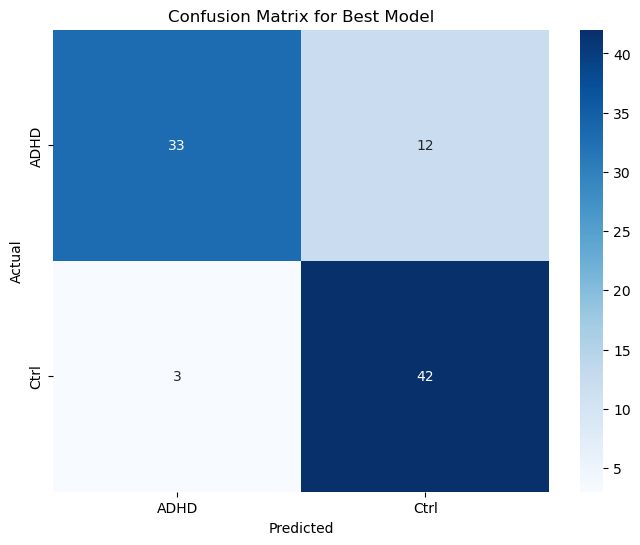

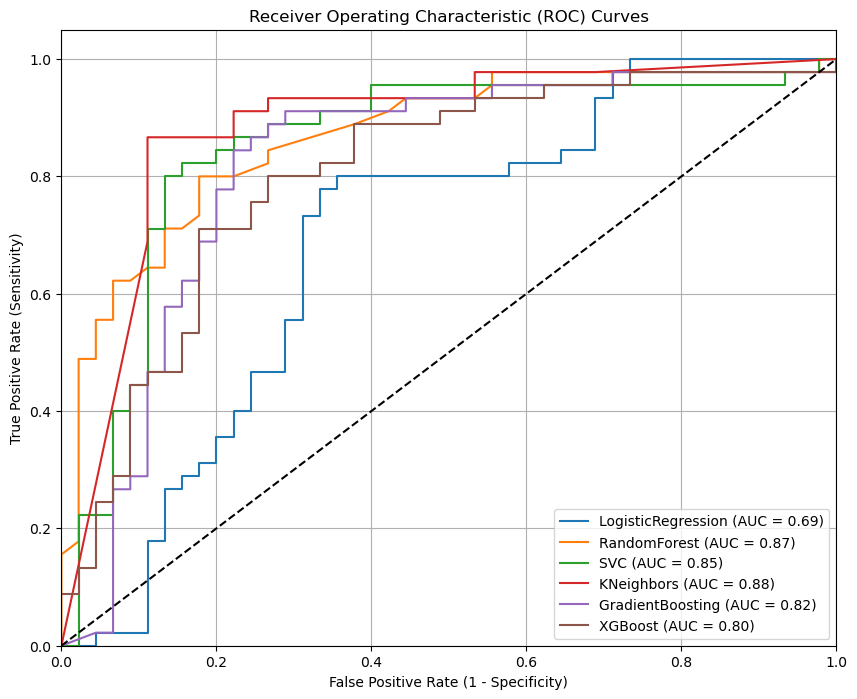


Model: LogisticRegression
Accuracy: 0.7111
AUC Score: 0.6874
Sensitivity: 0.8000
Specificity: 0.6222
Best Parameters: {'solver': 'lbfgs', 'max_iter': 1000, 'C': 0.1}

Confusion Matrix:
[[28 17]
 [ 9 36]]

Classification Report:
               precision    recall  f1-score   support

        ADHD       0.76      0.62      0.68        45
        Ctrl       0.68      0.80      0.73        45

    accuracy                           0.71        90
   macro avg       0.72      0.71      0.71        90
weighted avg       0.72      0.71      0.71        90


Model: RandomForest
Accuracy: 0.7889
AUC Score: 0.8684
Sensitivity: 0.8000
Specificity: 0.7778
Best Parameters: {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 2}

Confusion Matrix:
[[35 10]
 [ 9 36]]

Classification Report:
               precision    recall  f1-score   support

        ADHD       0.80      0.78      0.79        45
        Ctrl       0.78      0.80      0.79        45

    accuracy                           0.

In [4]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from itertools import product
from sklearn.preprocessing import LabelEncoder
from scipy.stats import mode
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import os

# Load the datasets
significant_df = pd.read_csv("../Data/full_dataset_without_behavioural_[2_class].csv", index_col=0)
subject_info = pd.read_csv('../../Full_dataset/Subject_info.csv')

# Remove the 52nd row in the features dataset
subject_info = subject_info.drop(index=51).reset_index(drop=True)

# Map group labels to integers
label_mapping = {'off-ADHD': 0, 'on-ADHD': 0, 'Ctrl': 1}
subject_info['GroupData'] = subject_info['GroupData'].replace(label_mapping)

# Extract features and labels
labels = subject_info['GroupData']
assert len(significant_df) == len(labels), "Mismatch between features and labels."

# Handle missing values
significant_df = significant_df.fillna(significant_df.mean())

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(significant_df)

# Define the target variable
y = labels.values

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Define models and their parameter grids
models = {
    'LogisticRegression': {
        'model': LogisticRegression(random_state=42),
        'params': {
            'solver': ['lbfgs', 'newton-cg', 'saga'],
            'max_iter': [1000, 5000],
            'C': [0.01, 0.1, 1.0]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    'SVC': {
        'model': SVC(random_state=42, probability=True),  # Enable probability estimates for ROC
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': ['scale', 'auto']
        }
    },
    'KNeighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10]
        }
    }
}

# Prepare for 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Variables to track the best model
best_model_name = None
best_model = None
best_params = None
best_accuracy = 0
best_predictions = None
best_confusion_matrix = None

# For ROC curves & per-model best
model_metrics = {}

# Evaluate models using K-Fold Cross-Validation for every combination of arguments
for model_name, model_info in models.items():
    print(f"Testing model: {model_name}")

    # Generate all combinations of parameters for the current model
    param_combinations = list(product(*model_info['params'].values()))

    for param_combination in param_combinations:
        params = dict(zip(model_info['params'].keys(), param_combination))
        model = model_info['model'].set_params(**params)

        fold_accuracies = []  # To store accuracies for each fold
        all_predictions = []  # To collect predictions across folds
        all_truths = []       # To collect true labels across folds
        all_probs = []        # To collect predicted probabilities

        # K-Fold Cross-Validation
        for train_index, valid_index in kf.split(X):
            X_train_fold, X_valid_fold = X[train_index], X[valid_index]
            y_train_fold, y_valid_fold = y[train_index], y[valid_index]

            # Train the model on the current fold
            model.fit(X_train_fold, y_train_fold)

            # Validate the model on the validation fold
            y_valid_pred = model.predict(X_valid_fold)
            if hasattr(model, "predict_proba"):
                y_valid_prob = model.predict_proba(X_valid_fold)[:, 1]
            elif hasattr(model, "decision_function"):
                y_valid_prob = model.decision_function(X_valid_fold)
            else:
                y_valid_prob = y_valid_pred

            # Collect predictions, probabilities, and true labels
            all_predictions.extend(y_valid_pred)
            all_probs.extend(y_valid_prob)
            all_truths.extend(y_valid_fold)

            # Calculate accuracy for the current fold
            fold_accuracies.append(accuracy_score(y_valid_fold, y_valid_pred))

        # Calculate the average accuracy across folds
        avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)

        # ROC curve metrics
        fpr, tpr, thresholds = roc_curve(all_truths, all_probs)
        auc_score = roc_auc_score(all_truths, all_probs)
        # Confusion matrix and sensitivity, specificity
        conf_matrix = confusion_matrix(all_truths, all_predictions)
        tn, fp, fn, tp = conf_matrix.ravel()
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)

        # Store metrics for ROC plot & track per-model best by AUC
        # ——— ADDED avg_accuracy into model_metrics ———
        if model_name not in model_metrics or model_metrics[model_name]['auc_score'] < auc_score:
            model_metrics[model_name] = {
                'fpr': fpr,
                'tpr': tpr,
                'auc_score': auc_score,
                'accuracy': avg_accuracy,            # ← capture best CV accuracy too
                'sensitivity': sensitivity,
                'specificity': specificity,
                'params': params,
                'confusion_matrix': conf_matrix,
                'classification_report': classification_report(all_truths, all_predictions, target_names=['ADHD', 'Ctrl'])
            }

        # Check if this model is the best so far (overall, by accuracy)
        if avg_accuracy > best_accuracy:
            best_accuracy = avg_accuracy
            best_model_name = model_name
            best_model = model
            best_params = params
            best_predictions = np.array(all_predictions)
            best_confusion_matrix = conf_matrix

# Print the best model and its parameters
print("\nBest Model:", best_model_name)
print("Best Parameters:", best_params)
print(f"Best Cross-Validation Accuracy: {best_accuracy:.4f}")

# Print the confusion matrix and classification report for the best model
print("\nConfusion Matrix:")
print(best_confusion_matrix)

classification_rep = classification_report(all_truths, best_predictions, target_names=['ADHD', 'Ctrl'])
print("\nClassification Report:\n", classification_rep)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(best_confusion_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['ADHD', 'Ctrl'],
            yticklabels=['ADHD', 'Ctrl'])
plt.title('Confusion Matrix for Best Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
for model_name, metrics in model_metrics.items():
    plt.plot(metrics['fpr'], metrics['tpr'], label=f"{model_name} (AUC = {metrics['auc_score']:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Print metrics for each model
for model_name, metrics in model_metrics.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")          # ← new line to print accuracy
    print(f"AUC Score: {metrics['auc_score']:.4f}")
    print(f"Sensitivity: {metrics['sensitivity']:.4f}")
    print(f"Specificity: {metrics['specificity']:.4f}")
    print("Best Parameters:", metrics['params'])
    print("\nConfusion Matrix:")
    print(metrics['confusion_matrix'])
    print("\nClassification Report:\n", metrics['classification_report'])


In [5]:
# ———————— NEW: save best param combos for each model ————————
save_dir = '../Models/Full_dataset[remove_behavioral]/Traditional ML Models'
os.makedirs(save_dir, exist_ok=True)

for model_name, metrics in model_metrics.items():
    param_dict = metrics['params']
    file_path = os.path.join(save_dir, f"{model_name}_best_params.pkl")
    joblib.dump(param_dict, file_path)
    print(f"Saved best params for {model_name} → {file_path}")

Saved best params for LogisticRegression → ../Models/Full_dataset[remove_behavioral]/Traditional ML Models/LogisticRegression_best_params.pkl
Saved best params for RandomForest → ../Models/Full_dataset[remove_behavioral]/Traditional ML Models/RandomForest_best_params.pkl
Saved best params for SVC → ../Models/Full_dataset[remove_behavioral]/Traditional ML Models/SVC_best_params.pkl
Saved best params for KNeighbors → ../Models/Full_dataset[remove_behavioral]/Traditional ML Models/KNeighbors_best_params.pkl
Saved best params for GradientBoosting → ../Models/Full_dataset[remove_behavioral]/Traditional ML Models/GradientBoosting_best_params.pkl
Saved best params for XGBoost → ../Models/Full_dataset[remove_behavioral]/Traditional ML Models/XGBoost_best_params.pkl


## Basic Temporal Models

In [35]:
!pip install tensorflow

  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.7/252.7 MB 5.2 MB/s eta 0:00:0000:0100:02
Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Using cached gast-0.6.0-py3-none-any.whl (21 kB)
Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 7.6 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 9.3 MB/s eta 0:00:00
Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl (25.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.4/670.4 kB 8.1 MB/s et

/var/folders/_j/0jj4c7rn493fwtp5zhsdxbwc0000gn/T/ipykernel_17369/2738764399.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  subject_info['GroupData'] = subject_info['GroupData'].replace(label_mapping)



Evaluating RNN with K-Fold Cross-Validation...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
RNN Average Accuracy: 0.7889
RNN - AUROC: 0.8371, Sensitivity: 0.8464, Specificity: 0.7424

Evaluating GRU with K-Fold Cross-Validation...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
GRU Average Accuracy: 0.7667
GRU - AUROC: 0

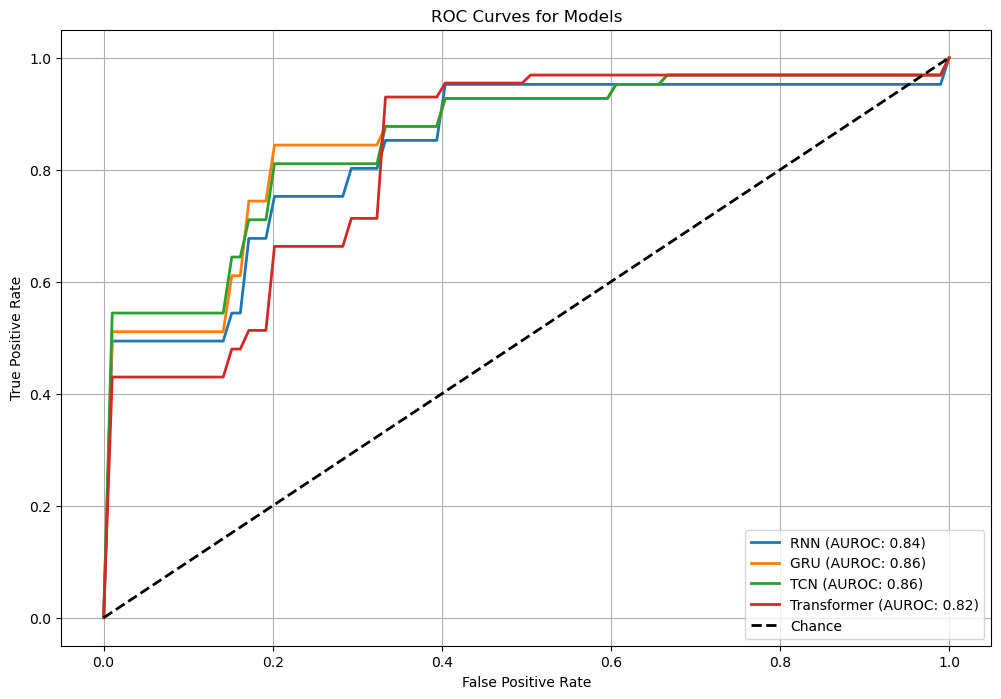

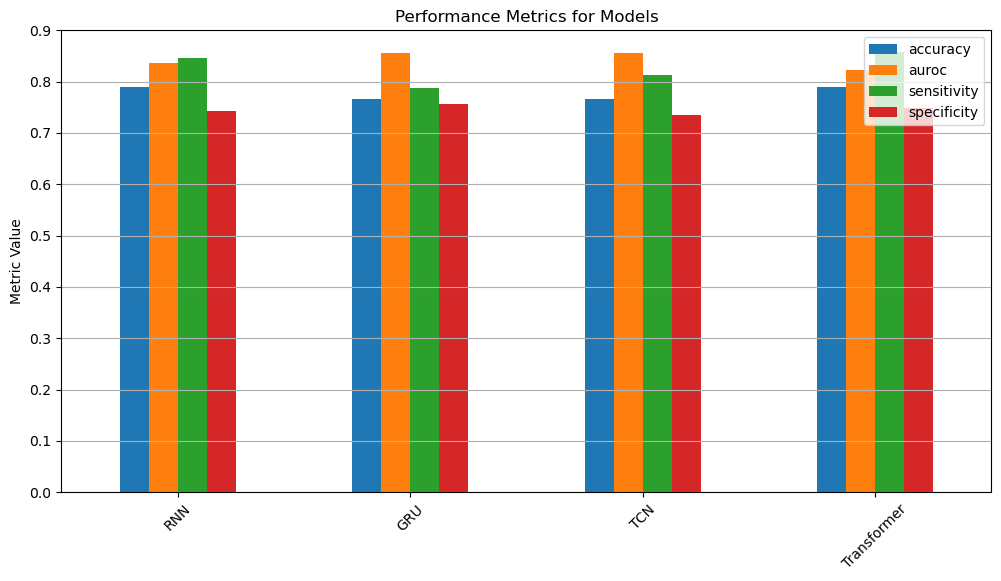


Model: RNN
Accuracy:    0.7889
AUROC:       0.8371
Sensitivity: 0.8464
Specificity: 0.7424

Model: GRU
Accuracy:    0.7667
AUROC:       0.8553
Sensitivity: 0.7881
Specificity: 0.7557

Model: TCN
Accuracy:    0.7667
AUROC:       0.8553
Sensitivity: 0.8131
Specificity: 0.7357

Model: Transformer
Accuracy:    0.7889
AUROC:       0.8227
Sensitivity: 0.8571
Specificity: 0.7490

Best Model: RNN
Accuracy:   0.7889

Classification Report:
              precision    recall  f1-score   support

        ADHD       0.84      0.71      0.77        45
        Ctrl       0.75      0.87      0.80        45

    accuracy                           0.79        90
   macro avg       0.80      0.79      0.79        90
weighted avg       0.80      0.79      0.79        90



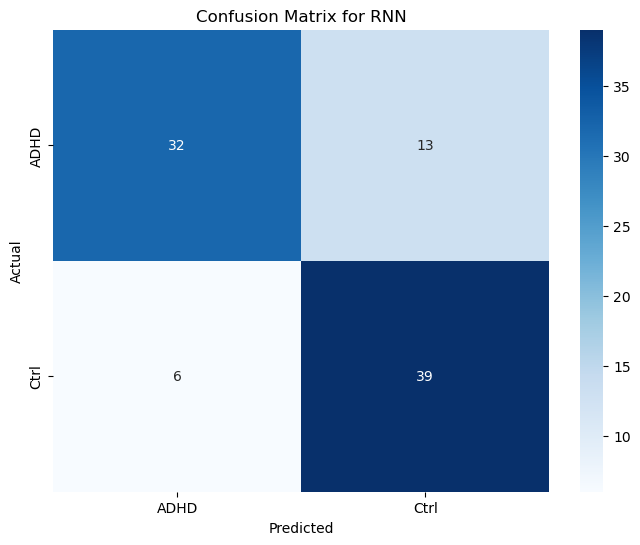

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Conv1D, Flatten, Dropout, TimeDistributed, Input
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os

# 1) Load the datasets
significant_df = pd.read_csv("../Data/full_dataset_without_behavioural_[2_class].csv", index_col=0)
subject_info = pd.read_csv('../../Full_dataset/Subject_info.csv')

# 2) Drop 52nd row & map labels
subject_info = subject_info.drop(index=51).reset_index(drop=True)
label_mapping = {'off-ADHD': 0, 'on-ADHD': 0, 'Ctrl': 1}
subject_info['GroupData'] = subject_info['GroupData'].replace(label_mapping)

# 3) Features / labels & assertions
labels = subject_info['GroupData']
assert len(significant_df) == len(labels), "Mismatch between features and labels."

# 4) Handle missing + normalize
significant_df = significant_df.fillna(significant_df.mean())
scaler = StandardScaler()
X = scaler.fit_transform(significant_df)
y = labels.values

# 5) SMOTE upsampling
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# 6) Reshape for temporal models
X = X.reshape((X.shape[0], 1, X.shape[1]))


# 7) Model‐builders
def build_rnn(input_shape):
    return Sequential([
        Input(shape=input_shape),
        SimpleRNN(128, activation='relu', return_sequences=True),
        Dropout(0.2),
        SimpleRNN(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(2, activation='softmax')
    ])

def build_gru(input_shape):
    return Sequential([
        Input(shape=input_shape),
        GRU(128, activation='relu', return_sequences=True),
        Dropout(0.3),
        GRU(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(2, activation='softmax')
    ])

def build_tcn(input_shape):
    return Sequential([
        Input(shape=input_shape),
        Conv1D(128, kernel_size=3, activation='relu', padding='same'),
        Dropout(0.2),
        Conv1D(64, kernel_size=3, activation='relu', padding='same'),
        Flatten(),
        Dense(32, activation='relu'),
        Dense(2, activation='softmax')
    ])

def build_transformer(input_shape):
    return Sequential([
        Input(shape=input_shape),
        TimeDistributed(Dense(128, activation='relu')),
        Dropout(0.2),
        LSTM(128, activation='relu', return_sequences=True),
        Dropout(0.2),
        LSTM(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(2, activation='softmax')
    ])


# 8) Set up models dict
models = {
    "RNN": build_rnn,
    "GRU": build_gru,
    "TCN": build_tcn,
    "Transformer": build_transformer
}


# 9) 10-fold CV
kf = KFold(n_splits=10, shuffle=True, random_state=42)
best_model_name = None
best_accuracy = 0
best_model = None
model_metrics = {}

for model_name, model_builder in models.items():
    print(f"\nEvaluating {model_name} with K-Fold Cross-Validation...")
    fold_accuracies = []
    tprs = []
    mean_fpr = np.linspace(0, 1, 100)
    aucs = []
    sensitivities = []
    specificities = []
    all_predictions = []
    all_truths = []

    for train_index, valid_index in kf.split(X):
        X_train, X_valid = X[train_index], X[valid_index]
        y_train, y_valid = y[train_index], y[valid_index]

        # Build, compile, and train
        model = model_builder(X_train.shape[1:])
        model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train, validation_data=(X_valid, y_valid),
                  epochs=100, batch_size=16, verbose=0)

        # Predict & gather metrics
        y_pred_prob = model.predict(X_valid)
        y_pred = np.argmax(y_pred_prob, axis=1)
        all_predictions.extend(y_pred)
        all_truths.extend(y_valid)

        acc = accuracy_score(y_valid, y_pred)
        fold_accuracies.append(acc)

        fpr, tpr, _ = roc_curve(y_valid, y_pred_prob[:, 1])
        tprs.append(np.interp(mean_fpr, fpr, tpr)); tprs[-1][0] = 0.0
        aucs.append(roc_auc_score(y_valid, y_pred_prob[:, 1]))

        cm = confusion_matrix(y_valid, y_pred)
        tn, fp, fn, tp = cm.ravel()
        sensitivities.append(tp / (tp + fn) if (tp + fn)>0 else 0)
        specificities.append(tn / (tn + fp) if (tn + fp)>0 else 0)

    # Compute averages
    avg_accuracy = np.mean(fold_accuracies)
    mean_tpr = np.mean(tprs, axis=0); mean_tpr[-1] = 1.0
    mean_auc = np.mean(aucs)
    mean_sensitivity = np.mean(sensitivities)
    mean_specificity = np.mean(specificities)

    # Print per‐model metrics
    print(f"{model_name} Average Accuracy: {avg_accuracy:.4f}")
    print(f"{model_name} - AUROC: {mean_auc:.4f}, Sensitivity: {mean_sensitivity:.4f}, Specificity: {mean_specificity:.4f}")

    model_metrics[model_name] = {
        'accuracy': avg_accuracy,
        'auroc': mean_auc,
        'sensitivity': mean_sensitivity,
        'specificity': mean_specificity,
        'fpr': mean_fpr,
        'tpr': mean_tpr
    }

    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_model_name = model_name
        best_model = model

# 10) ROC plot
plt.figure(figsize=(12, 8))
for name, m in model_metrics.items():
    plt.plot(m['fpr'], m['tpr'], lw=2, label=f"{name} (AUROC: {m['auroc']:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance')
plt.title('ROC Curves for Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# 11) Bar plot of metrics
results_df = pd.DataFrame(model_metrics).T[['accuracy','auroc','sensitivity','specificity']]
results_df.plot(kind='bar', figsize=(12,6))
plt.title('Performance Metrics for Models')
plt.ylabel('Metric Value')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(loc='upper right')
plt.show()

# 12) Print each model’s final metrics
for name, m in model_metrics.items():
    print(f"\nModel: {name}")
    print(f"Accuracy:    {m['accuracy']:.4f}")
    print(f"AUROC:       {m['auroc']:.4f}")
    print(f"Sensitivity: {m['sensitivity']:.4f}")
    print(f"Specificity: {m['specificity']:.4f}")

# 13) Best model summary
print(f"\nBest Model: {best_model_name}")
print(f"Accuracy:   {best_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(all_truths, all_predictions, target_names=['ADHD','Ctrl']))

# 14) Confusion matrix for best
cm = confusion_matrix(all_truths, all_predictions)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['ADHD','Ctrl'], yticklabels=['ADHD','Ctrl'])
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.show()


In [3]:
# ——— FINAL: Retrain & save **all** models on full data ———
save_dir = '../Models/Full_dataset[remove_behavioral]/Basic Temporal Models'
os.makedirs(save_dir, exist_ok=True)

for model_name, model_builder in models.items():
    # rebuild & compile
    m = model_builder(X.shape[1:])
    m.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # train on entire dataset
    m.fit(X, y, epochs=100, batch_size=16, verbose=0)
    # save
    out_path = os.path.join(save_dir, f"{model_name}.h5")
    m.save(out_path)
    print(f"Saved {model_name} → {out_path}")

Saved RNN → ../Models/Full_dataset[remove_behavioral]/Basic Temporal Models/RNN.h5


Saved GRU → ../Models/Full_dataset[remove_behavioral]/Basic Temporal Models/GRU.h5


Saved TCN → ../Models/Full_dataset[remove_behavioral]/Basic Temporal Models/TCN.h5


Saved Transformer → ../Models/Full_dataset[remove_behavioral]/Basic Temporal Models/Transformer.h5


## Complex Temporal Models

/var/folders/_j/0jj4c7rn493fwtp5zhsdxbwc0000gn/T/ipykernel_8743/520916111.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  subject_info['GroupData'] = subject_info['GroupData'].replace(label_mapping).astype(int)



Evaluating ResNet with K-Fold Cross-Validation...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
ResNet Average Accuracy: 0.8333
ResNet - AUROC: 0.8825, Sensitivity: 0.9298, Specificity: 0.7924


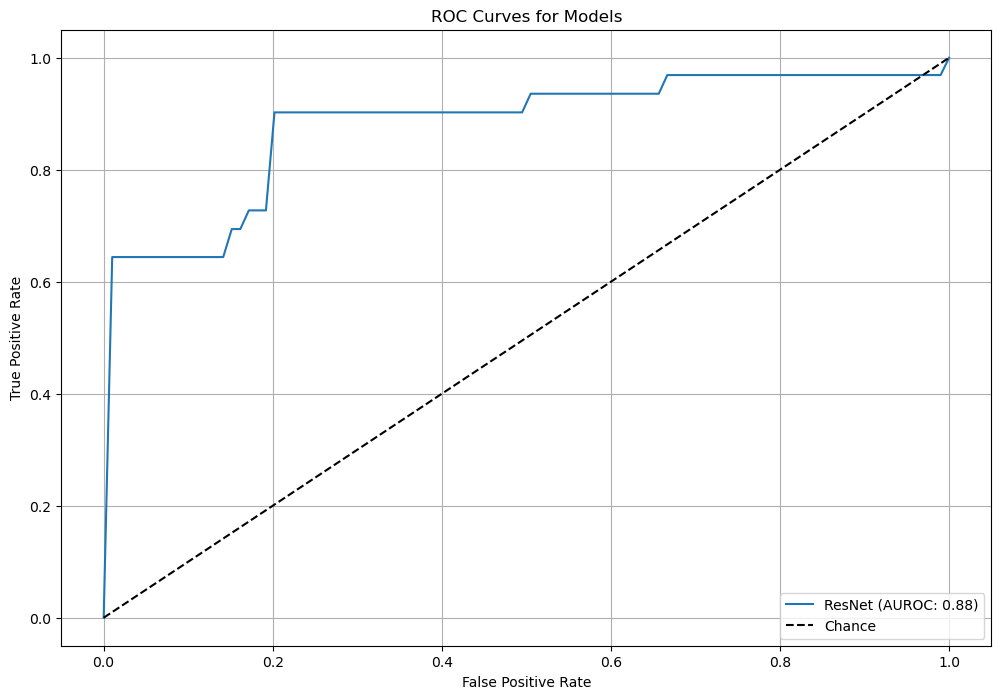

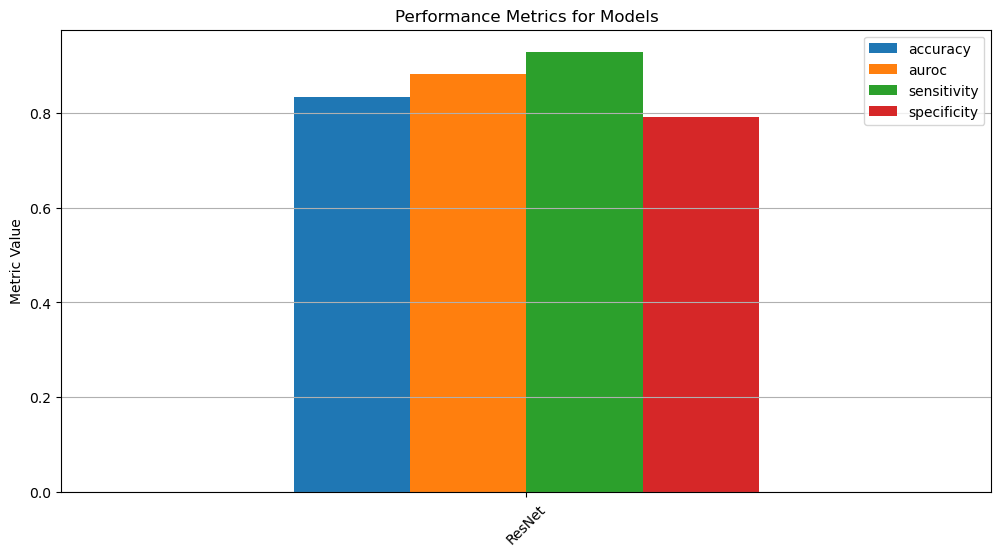


Model: ResNet
Accuracy:    0.8333
AUROC:       0.8825
Sensitivity: 0.9298
Specificity: 0.7924

Best Model: ResNet
Accuracy:   0.8333

Classification Report:
              precision    recall  f1-score   support

        ADHD       0.89      0.76      0.82        45
        Ctrl       0.79      0.91      0.85        45

    accuracy                           0.83        90
   macro avg       0.84      0.83      0.83        90
weighted avg       0.84      0.83      0.83        90



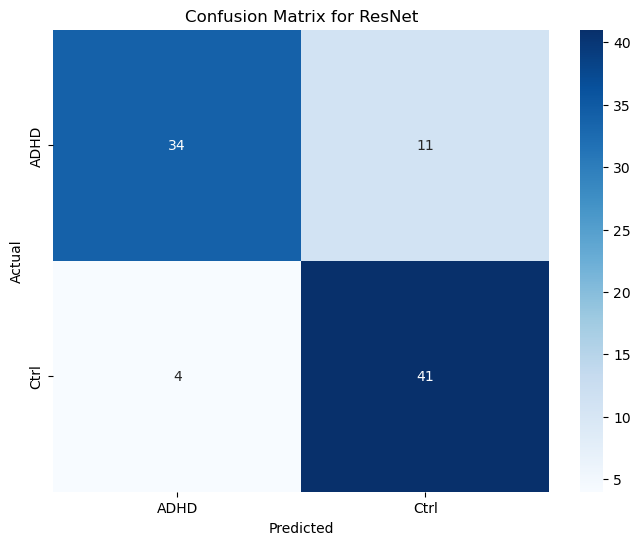

In [ ]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from tensorflow.keras.models import Model, Sequential, model_from_json
from tensorflow.keras.layers import (
    Input, Conv1D, BatchNormalization, Activation, Dense, Dropout,
    GlobalAveragePooling1D, Add, MultiHeadAttention, LayerNormalization
)
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pickle  # for .pkl saving

# Load and preprocess dataset
significant_df = pd.read_csv("../Data/full_dataset_without_behavioural_[2_class].csv", index_col=0)
subject_info = pd.read_csv('../../Full_dataset/Subject_info.csv')
subject_info = subject_info.drop(index=51).reset_index(drop=True)
label_mapping = {'off-ADHD': 0, 'on-ADHD': 0, 'Ctrl': 1}
subject_info['GroupData'] = subject_info['GroupData'].replace(label_mapping).astype(int)

labels = subject_info['GroupData']
assert len(significant_df) == len(labels), "Mismatch between features and labels."

significant_df = significant_df.fillna(significant_df.mean())
scaler = StandardScaler()
X = scaler.fit_transform(significant_df)
y = labels.values

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)
X = X.reshape((X.shape[0], X.shape[1], 1))


# Residual block for ResNet
def residual_block(input_tensor, filters):
    x = Conv1D(filters=filters, kernel_size=8, padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv1D(filters=filters, kernel_size=5, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv1D(filters=filters, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    shortcut = Conv1D(filters=filters, kernel_size=1, padding='same')(input_tensor)
    shortcut = BatchNormalization()(shortcut)
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

# ResNet builder
def build_resnet(input_shape, nb_classes=2):
    input_layer = Input(shape=input_shape)
    x = residual_block(input_layer, 64)
    x = residual_block(x, 128)
    x = residual_block(x, 128)
    x = GlobalAveragePooling1D()(x)
    output_layer = Dense(nb_classes, activation='softmax')(x)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

models = {
    "ResNet": build_resnet
}

# 10-fold CV evaluation (unchanged)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
best_model_name = None
best_accuracy = 0
best_model = None
model_metrics = {}

for model_name, model_builder in models.items():
    print(f"\nEvaluating {model_name} with K-Fold Cross-Validation...")
    fold_accuracies, tprs, aucs, sensitivities, specificities = [], [], [], [], []
    mean_fpr = np.linspace(0, 1, 100)
    all_predictions, all_truths = [], []

    for train_index, valid_index in kf.split(X):
        X_train, X_valid = X[train_index], X[valid_index]
        y_train, y_valid = y[train_index], y[valid_index]

        model = model_builder(X_train.shape[1:])
        model.fit(X_train, y_train, validation_data=(X_valid, y_valid),
                  epochs=100, batch_size=16, verbose=0)

        if(model_name == "Transformer"):
            y_pred_prob = model.predict(X_valid).ravel()
            y_pred = (y_pred_prob > 0.5).astype(int)
        else:
            y_pred_prob = model.predict(X_valid)
            y_pred = np.argmax(y_pred_prob, axis=1)

        all_predictions.extend(y_pred)
        all_truths.extend(y_valid)

        acc = accuracy_score(y_valid, y_pred)
        fold_accuracies.append(acc)
    
        if(model_name == "Transformer"):
            fpr, tpr, _ = roc_curve(y_valid, y_pred_prob)
            aucs.append(roc_auc_score(y_valid, y_pred_prob))
            tprs.append(np.interp(mean_fpr, fpr, tpr)); tprs[-1][0] = 0.0
        else:
            fpr, tpr, _ = roc_curve(y_valid, y_pred_prob[:, 1])
            tprs.append(np.interp(mean_fpr, fpr, tpr)); tprs[-1][0] = 0.0
            aucs.append(roc_auc_score(y_valid, y_pred_prob[:, 1]))

        cm = confusion_matrix(y_valid, y_pred)
        tn, fp, fn, tp = cm.ravel()
        sensitivities.append(tp/(tp+fn) if tp+fn>0 else 0)
        specificities.append(tn/(tn+fp) if tn+fp>0 else 0)

    avg_acc = np.mean(fold_accuracies)
    mean_tpr = np.mean(tprs, axis=0); mean_tpr[-1] = 1.0
    mean_auc = np.mean(aucs)
    mean_sens = np.mean(sensitivities)
    mean_spec = np.mean(specificities)

    print(f"{model_name} Average Accuracy: {avg_acc:.4f}")
    print(f"{model_name} - AUROC: {mean_auc:.4f}, Sensitivity: {mean_sens:.4f}, Specificity: {mean_spec:.4f}")

    model_metrics[model_name] = {
        'accuracy': avg_acc,
        'auroc': mean_auc,
        'sensitivity': mean_sens,
        'specificity': mean_spec,
        'fpr': mean_fpr,
        'tpr': mean_tpr
    }

    if avg_acc > best_accuracy:
        best_accuracy = avg_acc
        best_model_name = model_name
        best_model = model

# Plotting and prints (unchanged)
plt.figure(figsize=(12, 8))
for name, m in model_metrics.items():
    plt.plot(m['fpr'], m['tpr'], label=f"{name} (AUROC: {m['auroc']:.2f})")
plt.plot([0,1],[0,1],'k--', label='Chance')
plt.title('ROC Curves for Models')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.legend(loc='lower right'); plt.grid(); plt.show()

results_df = pd.DataFrame(model_metrics).T[['accuracy','auroc','sensitivity','specificity']]
results_df.plot(kind='bar', figsize=(12,6))
plt.title('Performance Metrics for Models')
plt.ylabel('Metric Value'); plt.xticks(rotation=45); plt.grid(axis='y'); plt.legend(loc='upper right')
plt.show()

for name, m in model_metrics.items():
    print(f"\nModel: {name}")
    print(f"Accuracy:    {m['accuracy']:.4f}")
    print(f"AUROC:       {m['auroc']:.4f}")
    print(f"Sensitivity: {m['sensitivity']:.4f}")
    print(f"Specificity: {m['specificity']:.4f}")

print(f"\nBest Model: {best_model_name}")
print(f"Accuracy:   {best_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(all_truths, all_predictions, target_names=['ADHD','Ctrl']))

cm = confusion_matrix(all_truths, all_predictions)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['ADHD','Ctrl'], yticklabels=['ADHD','Ctrl'])
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.show()


In [8]:
# —————————— FINAL BLOCK: save each model as .pkl ——————————

save_dir = '../Models/Full_dataset[remove_behavioral]/Complex Temporal Models'
os.makedirs(save_dir, exist_ok=True)

def save_keras_model_as_pickle(model, path):
    payload = {
        'config': model.to_json(),
        'weights': model.get_weights()
    }
    with open(path, 'wb') as f:
        pickle.dump(payload, f)

for model_name, model_builder in models.items():
    # rebuild & train on full data
    m = model_builder(X.shape[1:])
    m.fit(X, y, epochs=100, batch_size=16, verbose=0)
    # save
    pkl_path = os.path.join(save_dir, f"{model_name}.pkl")
    save_keras_model_as_pickle(m, pkl_path)
    print(f"Saved {model_name} → {pkl_path}")

Saved ResNet → ../Models/Full_dataset[remove_behavioral]/Complex Temporal Models/ResNet.pkl



Evaluating Transformer with K-Fold Cross-Validation...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Transformer Average Accuracy: 0.7889
Transformer - AUROC: 0.8527, Sensitivity: 0.8321, Specificity: 0.7638


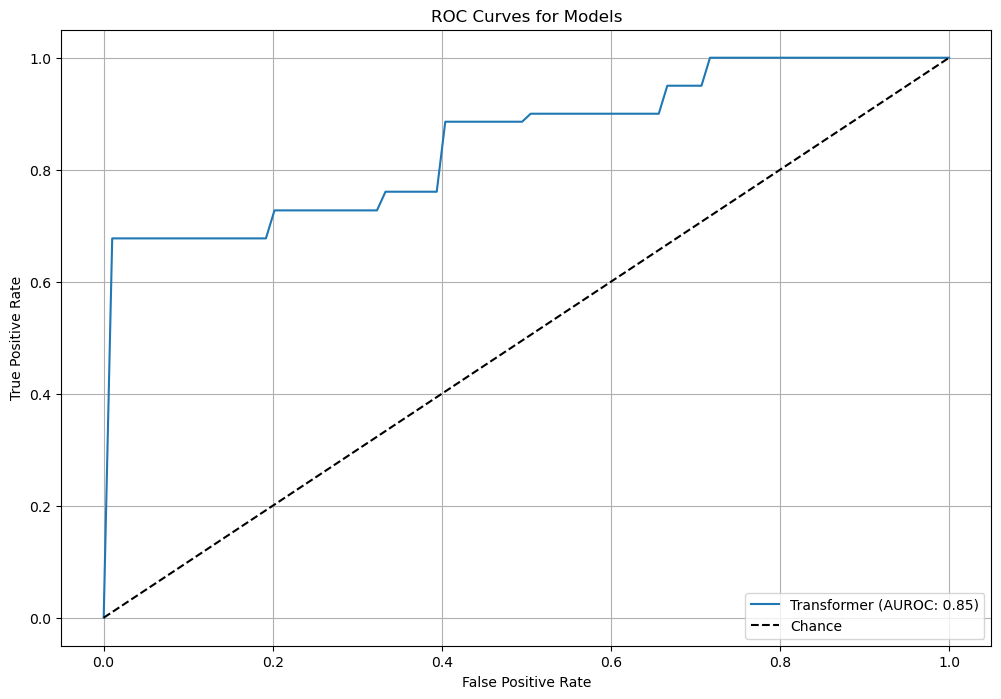

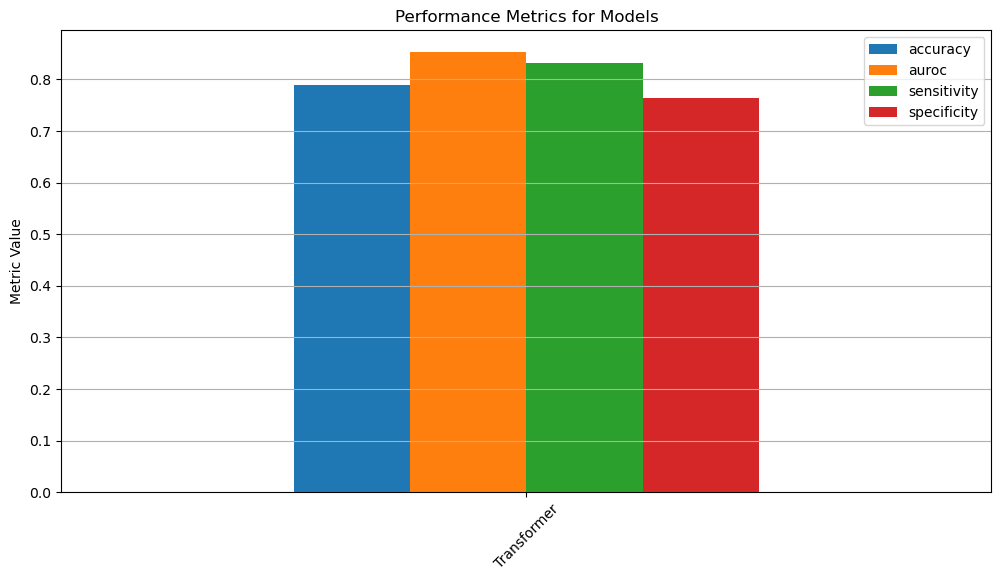


Model: Transformer
Accuracy:    0.7889
AUROC:       0.8527
Sensitivity: 0.8321
Specificity: 0.7638

Best Model: Transformer
Accuracy:   0.7889

Classification Report:
              precision    recall  f1-score   support

        ADHD       0.82      0.73      0.78        45
        Ctrl       0.76      0.84      0.80        45

    accuracy                           0.79        90
   macro avg       0.79      0.79      0.79        90
weighted avg       0.79      0.79      0.79        90



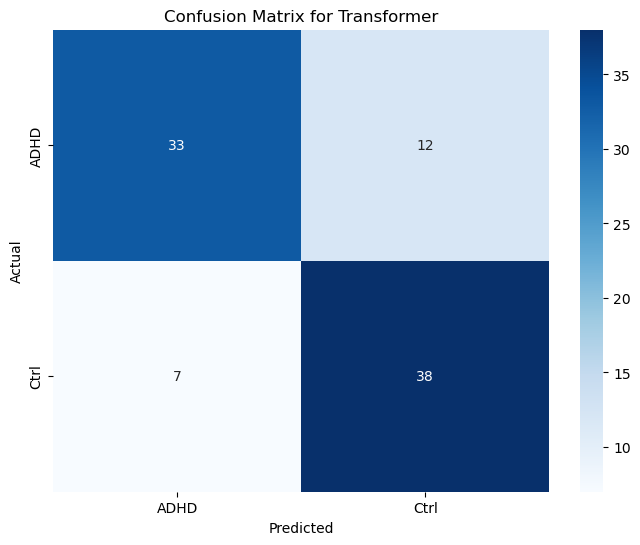

In [10]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from tensorflow.keras.models import Model, Sequential, model_from_json
from tensorflow.keras.layers import (
    Input, Conv1D, BatchNormalization, Activation, Add, Dense, Dropout,
    GlobalAveragePooling1D, Add, MultiHeadAttention, LayerNormalization
)
from tensorflow.keras.layers import TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pickle  # for .pkl saving

# Load and preprocess dataset
significant_df = pd.read_csv("../Data/full_dataset_without_behavioural_[2_class].csv", index_col=0)
subject_info = pd.read_csv('../../Full_dataset/Subject_info.csv')
subject_info = subject_info.drop(index=51).reset_index(drop=True)
label_mapping = {'off-ADHD': 0, 'on-ADHD': 0, 'Ctrl': 1}
subject_info['GroupData'] = subject_info['GroupData'].replace(label_mapping).astype(int)

labels = subject_info['GroupData']
assert len(significant_df) == len(labels), "Mismatch between features and labels."

significant_df = significant_df.fillna(significant_df.mean())
scaler = StandardScaler()
X = scaler.fit_transform(significant_df)
y = labels.values

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Transformer builder
def build_transformer(input_shape, 
                      num_blocks=1, num_heads=4, key_dim=32, ff_dim=128):
    inp = Input(shape=input_shape)
    x = TimeDistributed(Dense(128, activation='relu'))(inp)
    x = Dropout(0.2)(x)
    # Positional encoding would go here if needed...
    for _ in range(num_blocks):
        # Multi‐head self‐attention + residual + norm
        attn_out = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(x, x)
        x = LayerNormalization()(Add()([x, attn_out]))
        # Feed‐forward + residual + norm
        ffn = Dense(ff_dim, activation='relu')(x)
        ffn = Dense(ff_dim)(ffn)
        x = LayerNormalization()(Add()([x, ffn]))
    x = Flatten()(x)
    x = Dense(32, activation='relu')(x)
    out = Dense(2, activation='softmax')(x)
    return Model(inp, out)

models = {
    # "ResNet": build_resnet
    "Transformer": build_transformer
}

# 10-fold CV evaluation (unchanged)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
best_model_name = None
best_accuracy = 0
best_model = None
model_metrics = {}

for model_name, model_builder in models.items():
    print(f"\nEvaluating {model_name} with K-Fold Cross-Validation...")
    fold_accuracies, tprs, aucs, sensitivities, specificities = [], [], [], [], []
    mean_fpr = np.linspace(0, 1, 100)
    all_predictions, all_truths = [], []

    for train_index, valid_index in kf.split(X):
        X_train, X_valid = X[train_index], X[valid_index]
        y_train, y_valid = y[train_index], y[valid_index]

        model = model_builder(X_train.shape[1:])
        model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train, validation_data=(X_valid, y_valid),
                  epochs=100, batch_size=16, verbose=0)

        y_pred_prob = model.predict(X_valid)            # shape=(batch,2)
        y_pred      = np.argmax(y_pred_prob, axis=1)
        fpr, tpr, _ = roc_curve(y_valid, y_pred_prob[:,1])

        all_predictions.extend(y_pred)
        all_truths.extend(y_valid)

        acc = accuracy_score(y_valid, y_pred)
        fold_accuracies.append(acc)

        aucs.append(roc_auc_score(y_valid, y_pred_prob[:,1]))
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0

        cm = confusion_matrix(y_valid, y_pred)
        tn, fp, fn, tp = cm.ravel()
        sensitivities.append(tp/(tp+fn) if tp+fn>0 else 0)
        specificities.append(tn/(tn+fp) if tn+fp>0 else 0)

    avg_acc = np.mean(fold_accuracies)
    mean_tpr = np.mean(tprs, axis=0); mean_tpr[-1] = 1.0
    mean_auc = np.mean(aucs)
    mean_sens = np.mean(sensitivities)
    mean_spec = np.mean(specificities)

    print(f"{model_name} Average Accuracy: {avg_acc:.4f}")
    print(f"{model_name} - AUROC: {mean_auc:.4f}, Sensitivity: {mean_sens:.4f}, Specificity: {mean_spec:.4f}")

    model_metrics[model_name] = {
        'accuracy': avg_acc,
        'auroc': mean_auc,
        'sensitivity': mean_sens,
        'specificity': mean_spec,
        'fpr': mean_fpr,
        'tpr': mean_tpr
    }

    if avg_acc > best_accuracy:
        best_accuracy = avg_acc
        best_model_name = model_name
        best_model = model

# Plotting and prints (unchanged)
plt.figure(figsize=(12, 8))
for name, m in model_metrics.items():
    plt.plot(m['fpr'], m['tpr'], label=f"{name} (AUROC: {m['auroc']:.2f})")
plt.plot([0,1],[0,1],'k--', label='Chance')
plt.title('ROC Curves for Models')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.legend(loc='lower right'); plt.grid(); plt.show()

results_df = pd.DataFrame(model_metrics).T[['accuracy','auroc','sensitivity','specificity']]
results_df.plot(kind='bar', figsize=(12,6))
plt.title('Performance Metrics for Models')
plt.ylabel('Metric Value'); plt.xticks(rotation=45); plt.grid(axis='y'); plt.legend(loc='upper right')
plt.show()

for name, m in model_metrics.items():
    print(f"\nModel: {name}")
    print(f"Accuracy:    {m['accuracy']:.4f}")
    print(f"AUROC:       {m['auroc']:.4f}")
    print(f"Sensitivity: {m['sensitivity']:.4f}")
    print(f"Specificity: {m['specificity']:.4f}")

print(f"\nBest Model: {best_model_name}")
print(f"Accuracy:   {best_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(all_truths, all_predictions, target_names=['ADHD','Ctrl']))

cm = confusion_matrix(all_truths, all_predictions)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['ADHD','Ctrl'], yticklabels=['ADHD','Ctrl'])
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.show()


In [ ]:
# —————————— FINAL BLOCK: save each model as .pkl ——————————

save_dir = '../Models/Full_dataset[remove_behavioral]/Complex Temporal Models'
os.makedirs(save_dir, exist_ok=True)

def save_keras_model_as_pickle(model, path):
    payload = {
        'config': model.to_json(),
        'weights': model.get_weights()
    }
    with open(path, 'wb') as f:
        pickle.dump(payload, f)

for model_name, model_builder in models.items():
    # rebuild & train on full data
    m = model_builder(X.shape[1:])
    m.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    m.fit(X, y, epochs=100, batch_size=16, verbose=0)
    # save
    pkl_path = os.path.join(save_dir, f"{model_name}.pkl")
    save_keras_model_as_pickle(m, pkl_path)
    print(f"Saved {model_name} → {pkl_path}")

Saved Transformer → ../Models/Full_dataset[remove_behavioural]/Complex Temporal Models/Transformer.pkl


## Ablation Analysis 

#### a. LSTM

/var/folders/_j/0jj4c7rn493fwtp5zhsdxbwc0000gn/T/ipykernel_1588/2022774204.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  subject_info['GroupData'] = subject_info['GroupData'].replace(label_mapping)



Evaluating LSTM with K-Fold Cross-Validation...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
LSTM Average Accuracy: 0.7778
LSTM - AUROC: 0.8532, Sensitivity: 0.7881, Specificity: 0.7757


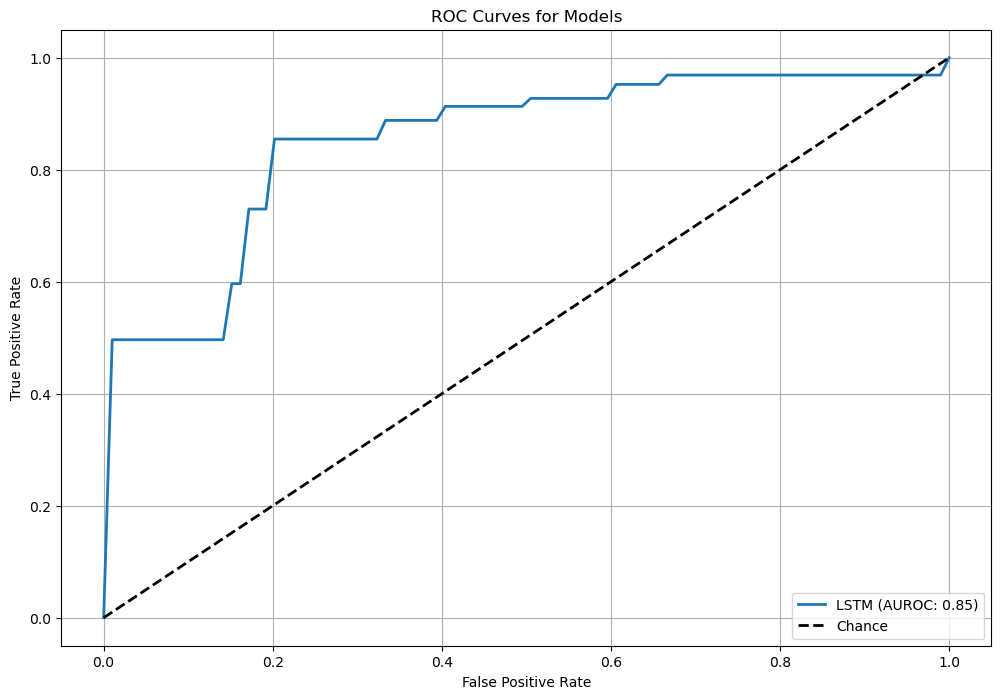

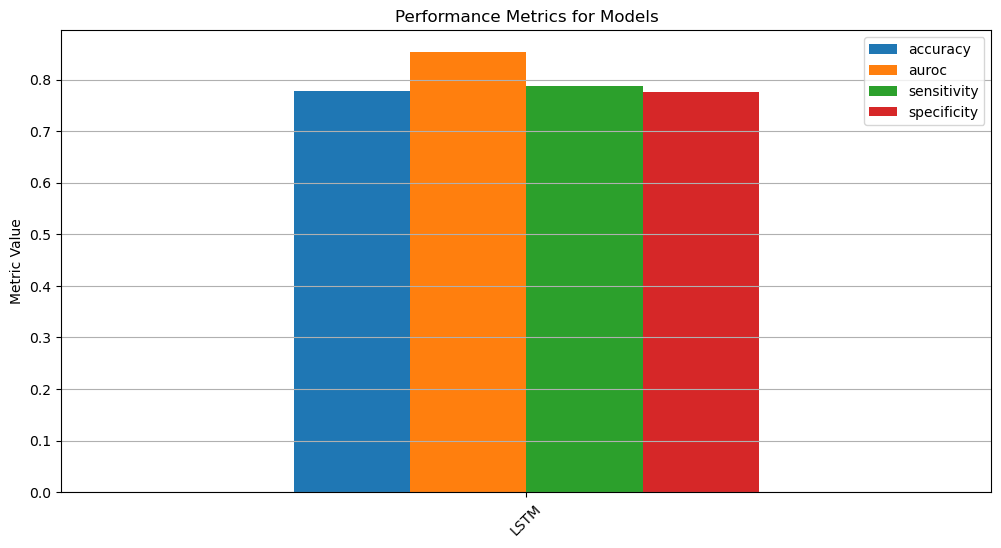


Model: LSTM
Accuracy:    0.7778
AUROC:       0.8532
Sensitivity: 0.7881
Specificity: 0.7757

Best Model: LSTM
Accuracy:   0.7778

Classification Report:
              precision    recall  f1-score   support

        ADHD       0.79      0.76      0.77        45
        Ctrl       0.77      0.80      0.78        45

    accuracy                           0.78        90
   macro avg       0.78      0.78      0.78        90
weighted avg       0.78      0.78      0.78        90



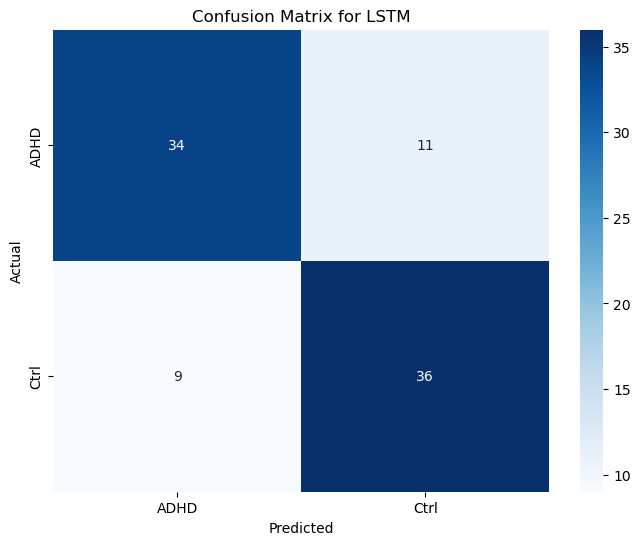

Saved LSTM → ../Models/Full_dataset[remove_behavioral]/Final Models with ablation analysis/LSTM.h5


In [40]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Conv1D, Flatten, Dropout, TimeDistributed, Input
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os

# 1) Load the datasets
significant_df = pd.read_csv("../Data/full_dataset_without_behavioural_[2_class].csv", index_col=0)
subject_info = pd.read_csv('../../Full_dataset/Subject_info.csv')

# 2) Drop 52nd row & map labels
subject_info = subject_info.drop(index=51).reset_index(drop=True)
label_mapping = {'off-ADHD': 0, 'on-ADHD': 0, 'Ctrl': 1}
subject_info['GroupData'] = subject_info['GroupData'].replace(label_mapping)

# 3) Features / labels & assertions
labels = subject_info['GroupData']
assert len(significant_df) == len(labels), "Mismatch between features and labels."

# 4) Handle missing + normalize
significant_df = significant_df.fillna(significant_df.mean())
scaler = StandardScaler()
X = scaler.fit_transform(significant_df)
y = labels.values

# 5) SMOTE upsampling
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# 6) Reshape for temporal models
X = X.reshape((X.shape[0], 1, X.shape[1]))


# 7) Model‐builders
def build_lstm(input_shape):
    return Sequential([
        Input(shape=input_shape),
        LSTM(128, activation='relu', return_sequences=True),
        Dropout(0.3),
        LSTM(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(2, activation='softmax')
    ])

# 8) Set up models dict
models = {
    "LSTM": build_lstm
}

# 9) 10-fold CV
kf = KFold(n_splits=10, shuffle=True, random_state=42)
best_model_name = None
best_accuracy = 0
best_model = None
model_metrics = {}

for model_name, model_builder in models.items():
    print(f"\nEvaluating {model_name} with K-Fold Cross-Validation...")
    fold_accuracies = []
    tprs = []
    mean_fpr = np.linspace(0, 1, 100)
    aucs = []
    sensitivities = []
    specificities = []
    all_predictions = []
    all_truths = []

    for train_index, valid_index in kf.split(X):
        X_train, X_valid = X[train_index], X[valid_index]
        y_train, y_valid = y[train_index], y[valid_index]

        # Build, compile, and train
        model = model_builder(X_train.shape[1:])
        model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train, validation_data=(X_valid, y_valid),
                  epochs=100, batch_size=16, verbose=0)

        # Predict & gather metrics
        y_pred_prob = model.predict(X_valid)
        y_pred = np.argmax(y_pred_prob, axis=1)
        all_predictions.extend(y_pred)
        all_truths.extend(y_valid)

        acc = accuracy_score(y_valid, y_pred)
        fold_accuracies.append(acc)

        fpr, tpr, _ = roc_curve(y_valid, y_pred_prob[:, 1])
        tprs.append(np.interp(mean_fpr, fpr, tpr)); tprs[-1][0] = 0.0
        aucs.append(roc_auc_score(y_valid, y_pred_prob[:, 1]))

        cm = confusion_matrix(y_valid, y_pred)
        tn, fp, fn, tp = cm.ravel()
        sensitivities.append(tp / (tp + fn) if (tp + fn)>0 else 0)
        specificities.append(tn / (tn + fp) if (tn + fp)>0 else 0)

    # Compute averages
    avg_accuracy = np.mean(fold_accuracies)
    mean_tpr = np.mean(tprs, axis=0); mean_tpr[-1] = 1.0
    mean_auc = np.mean(aucs)
    mean_sensitivity = np.mean(sensitivities)
    mean_specificity = np.mean(specificities)

    # Print per‐model metrics
    print(f"{model_name} Average Accuracy: {avg_accuracy:.4f}")
    print(f"{model_name} - AUROC: {mean_auc:.4f}, Sensitivity: {mean_sensitivity:.4f}, Specificity: {mean_specificity:.4f}")

    model_metrics[model_name] = {
        'accuracy': avg_accuracy,
        'auroc': mean_auc,
        'sensitivity': mean_sensitivity,
        'specificity': mean_specificity,
        'fpr': mean_fpr,
        'tpr': mean_tpr
    }

    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_model_name = model_name
        best_model = model

# 10) ROC plot
plt.figure(figsize=(12, 8))
for name, m in model_metrics.items():
    plt.plot(m['fpr'], m['tpr'], lw=2, label=f"{name} (AUROC: {m['auroc']:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance')
plt.title('ROC Curves for Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# 11) Bar plot of metrics
results_df = pd.DataFrame(model_metrics).T[['accuracy','auroc','sensitivity','specificity']]
results_df.plot(kind='bar', figsize=(12,6))
plt.title('Performance Metrics for Models')
plt.ylabel('Metric Value')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(loc='upper right')
plt.show()

# 12) Print each model’s final metrics
for name, m in model_metrics.items():
    print(f"\nModel: {name}")
    print(f"Accuracy:    {m['accuracy']:.4f}")
    print(f"AUROC:       {m['auroc']:.4f}")
    print(f"Sensitivity: {m['sensitivity']:.4f}")
    print(f"Specificity: {m['specificity']:.4f}")

# 13) Best model summary
print(f"\nBest Model: {best_model_name}")
print(f"Accuracy:   {best_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(all_truths, all_predictions, target_names=['ADHD','Ctrl']))

# 14) Confusion matrix for best
cm = confusion_matrix(all_truths, all_predictions)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['ADHD','Ctrl'], yticklabels=['ADHD','Ctrl'])
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.show()


# ——— FINAL: Retrain & save **all** models on full data ———
save_dir = '../Models/Full_dataset[remove_behavioral]/Final Models with ablation analysis'
os.makedirs(save_dir, exist_ok=True)

for model_name, model_builder in models.items():
    # rebuild & compile
    m = model_builder(X.shape[1:])
    m.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # train on entire dataset
    m.fit(X, y, epochs=100, batch_size=16, verbose=0)
    # save
    out_path = os.path.join(save_dir, f"{model_name}.h5")
    m.save(out_path)
    print(f"Saved {model_name} → {out_path}")


#### b. ConvLSTM

/var/folders/_j/0jj4c7rn493fwtp5zhsdxbwc0000gn/T/ipykernel_1588/4194345007.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  subject_info['GroupData'] = subject_info['GroupData'].replace(label_mapping)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



----- Fold 1 -----
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step

----- Fold 2 -----


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step

----- Fold 3 -----


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step

----- Fold 4 -----


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step

----- Fold 5 -----


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step

----- Fold 6 -----


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step

----- Fold 7 -----


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step

----- Fold 8 -----


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step

----- Fold 9 -----


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step

----- Fold 10 -----


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step

Avg Accuracy: 0.8111, AUROC: 0.8832, Sens: 0.9214, Spec: 0.7557


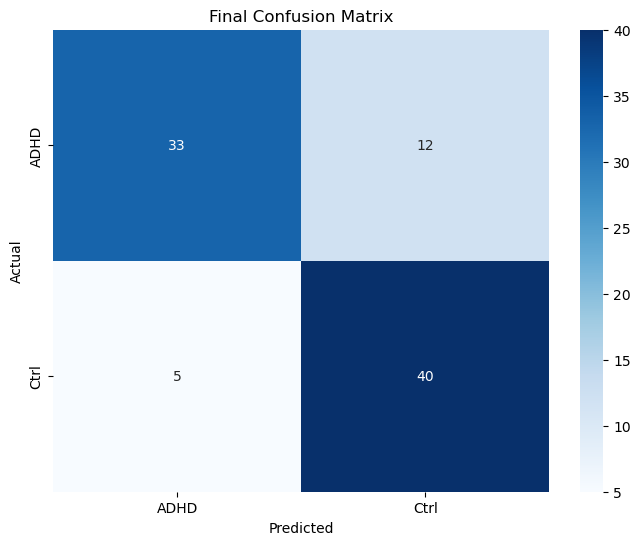

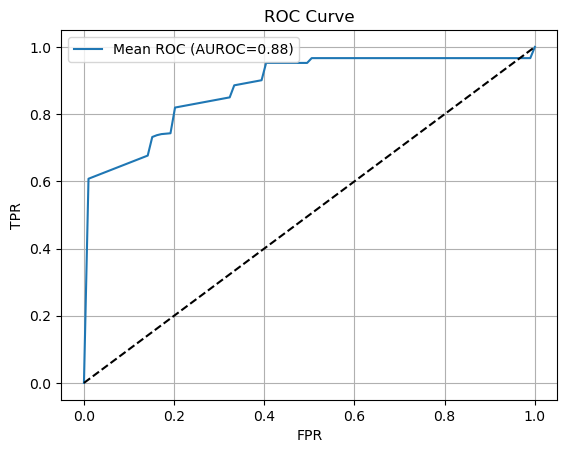

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Saved model → ../Models/Full_dataset[remove_behavioral]/Final Models with ablation analysis/ConvLSTM.h5


In [48]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (
    Conv1D, LSTM, Dense, Dropout, BatchNormalization, Input, Attention
)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load and preprocess dataset
significant_df = pd.read_csv("../Data/full_dataset_without_behavioural_[2_class].csv", index_col=0)
subject_info = pd.read_csv('../../Full_dataset/Subject_info.csv')
subject_info = subject_info.drop(index=51).reset_index(drop=True)
label_mapping = {'off-ADHD': 0, 'on-ADHD': 0, 'Ctrl': 1}
subject_info['GroupData'] = subject_info['GroupData'].replace(label_mapping)

labels = subject_info['GroupData']
assert len(significant_df) == len(labels), "Mismatch between features and labels."

significant_df = significant_df.fillna(significant_df.mean())
scaler = StandardScaler()
X = scaler.fit_transform(significant_df)
y = labels.values

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
X_smote = X_smote.reshape((X_smote.shape[0], 1, X_smote.shape[1]))

# Define attention block
def attention_block(inputs):
    return Attention()([inputs, inputs])

# Build model with attention
def build_model(input_shape, nb_classes):
    model = Sequential([
        Conv1D(128, kernel_size=1, activation='relu', input_shape=input_shape),  # Kernel size adjusted to 1
        BatchNormalization(),
        Dropout(0.3),
        Conv1D(64, kernel_size=1, activation='relu'),  # Kernel size adjusted to 1
        BatchNormalization(),
        LSTM(64, activation='relu', return_sequences=True),
        Dropout(0.3),
        LSTM(32, activation='relu'),
        Dense(nb_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# 10-fold Cross-Validation
k_folds = 10
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

fold_accuracies = []
fold_aurocs = []
fold_sens = []
fold_spec = []
tprs = []
mean_fpr = np.linspace(0, 1, 100)
all_preds = []
all_trues = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X_smote, y_smote)):
    print(f"\n----- Fold {fold+1} -----")
    X_train, X_test = X_smote[train_idx], X_smote[test_idx]
    y_train, y_test = y_smote[train_idx], y_smote[test_idx]

    model = build_model(X_train.shape[1:], nb_classes=2)
    model.fit(X_train, y_train, epochs=150, batch_size=16, verbose=0)

    y_prob = model.predict(X_test)
    y_pred = np.argmax(y_prob, axis=1)
    all_preds.extend(y_pred)
    all_trues.extend(y_test)

    acc = accuracy_score(y_test, y_pred)
    fold_accuracies.append(acc)

    fpr, tpr, _ = roc_curve(y_test, y_prob[:,1])
    tprs.append(np.interp(mean_fpr, fpr, tpr)); tprs[-1][0]=0.0
    fold_aurocs.append(roc_auc_score(y_test, y_prob[:,1]))

    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    fold_sens.append(tp/(tp+fn) if tp+fn>0 else 0)
    fold_spec.append(tn/(tn+fp) if tn+fp>0 else 0)

# Summary prints & plots (unchanged) …
mean_acc = np.mean(fold_accuracies)
mean_auc = np.mean(fold_aurocs)
mean_s = np.mean(fold_sens)
mean_sp = np.mean(fold_spec)
print(f"\nAvg Accuracy: {mean_acc:.4f}, AUROC: {mean_auc:.4f}, Sens: {mean_s:.4f}, Spec: {mean_sp:.4f}")

cm_final = confusion_matrix(all_trues, all_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues',
            xticklabels=['ADHD','Ctrl'], yticklabels=['ADHD','Ctrl'])
plt.title('Final Confusion Matrix'); plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.show()

mean_tpr = np.mean(tprs,axis=0); mean_tpr[-1]=1.0
plt.plot(mean_fpr, mean_tpr, label=f'Mean ROC (AUROC={mean_auc:.2f})')
plt.plot([0,1],[0,1],'k--'); plt.xlabel('FPR'); plt.ylabel('TPR')
plt.title('ROC Curve'); plt.legend(); plt.grid(); plt.show()

# ——— Retrain on full data & save model ———
save_dir = '../Models/Full_dataset[remove_behavioral]/Final Models with ablation analysis'
os.makedirs(save_dir, exist_ok=True)

final_model = build_model(X_smote.shape[1:], nb_classes=2)
final_model.fit(X_smote, y_smote, epochs=150, batch_size=16, verbose=0)

h5_path = os.path.join(save_dir, 'ConvLSTM.h5')
final_model.save(h5_path)
print(f"\nSaved model → {h5_path}")


#### c. CNN-LSTM-GMM (No attention)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

/var/folders/_j/0jj4c7rn493fwtp5zhsdxbwc0000gn/T/ipykernel_1588/3674118465.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  subject_info['GroupData'] = subject_info['GroupData'].replace(label_mapping)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

Processing Fold 1...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
Fold 1 Accuracy: 0.8889

Processing Fold 2...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
Fold 2 Accuracy: 0.7778

Processing Fold 3...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
Fold 3 Accuracy: 0.8889

Processing Fold 4...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
Fold 4 Accuracy: 0.7778

Processing Fold 5...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
Fold 5 Accuracy: 1.0000

Processing Fold 6...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
Fold 6 Accuracy: 0.7778

Processing Fold 7...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
Fold 7 Accuracy: 0.8889

Processing Fold 8...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
Fold 8 Accuracy: 0.8889

Processing Fold 9...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
Fold 9 Accuracy: 0.8889

Processing Fold 10...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
Fold 10 Accuracy: 0.6667

Mean Accuracy: 0.8444


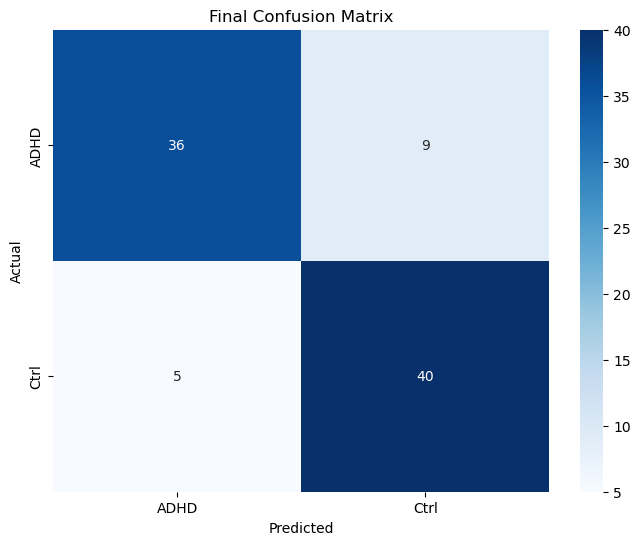

AUROC: 0.8741
Sensitivity: 0.8667
Specificity: 0.8667


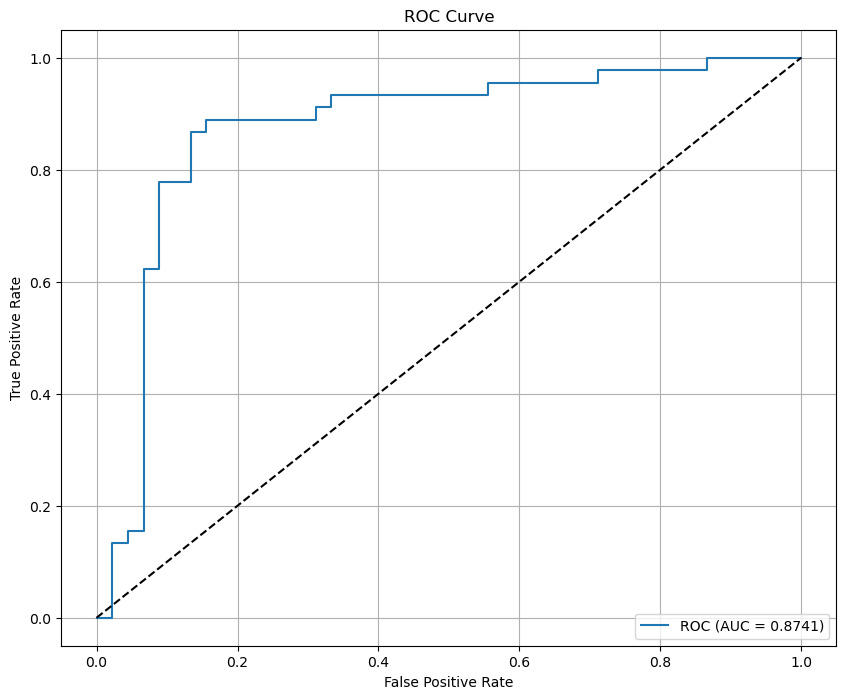


Saved model → ../Models/Full_dataset[remove_behavioral]/Final Models with ablation analysis/CNN_LSTM_GMM_noattention.h5


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv1D, LSTM, Dense, Dropout, BatchNormalization,
    Attention, Flatten, Concatenate, Lambda
)
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import os

significant_df = pd.read_csv("../Data/full_dataset_without_behavioural_[2_class].csv", index_col=0)
subject_info = pd.read_csv('../../Full_dataset/Subject_info.csv')
subject_info = subject_info.drop(index=51).reset_index(drop=True)

label_mapping = {'off-ADHD': 0, 'on-ADHD': 0, 'Ctrl': 1}
subject_info['GroupData'] = subject_info['GroupData'].replace(label_mapping)
labels = subject_info['GroupData']

significant_df = significant_df.fillna(significant_df.mean())
scaler = StandardScaler()
X = scaler.fit_transform(significant_df)
y = labels.values

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

X_cnn_input = X_smote.reshape((X_smote.shape[0], 1, X_smote.shape[1]))

cnn_input = Input(shape=(1, X.shape[1]))
x = Conv1D(64, 3, activation='relu', padding='same')(cnn_input)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Conv1D(128, 3, activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Flatten()(x)
cnn_feature_model = Model(inputs=cnn_input, outputs=x)
cnn_features = cnn_feature_model.predict(X_cnn_input)

gmm = GaussianMixture(n_components=2, random_state=42)
gmm_soft = gmm.fit_predict(cnn_features)  # if you need hard labels
gmm_soft = gmm.predict_proba(cnn_features)

X_augmented = np.concatenate([X_smote, gmm_soft], axis=1)
X_augmented = X_augmented.reshape((X_augmented.shape[0], 1, X_augmented.shape[1]))

def build_hybrid_model_with_gmm(input_shape, nb_classes):
    inputs = Input(shape=input_shape)
    x = LSTM(64, return_sequences=True)(inputs)
    x = BatchNormalization()(x)
    x = LSTM(128, return_sequences=True)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = LSTM(32, return_sequences=False)(x)
    x = BatchNormalization()(x)
    lstm_features = Dense(64, activation='relu')(x)

    gmm_input = Lambda(lambda z: z[:, 0, -2:])(inputs)
    gmm_dense = Dense(16, activation='relu')(gmm_input)

    combined = Concatenate()([lstm_features, gmm_dense])
    combined = Dense(64, activation='relu')(combined)
    outputs = Dense(nb_classes, activation='softmax')(combined)

    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

k_folds = 10
kf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

fold_accuracies = []
all_predictions = []
all_truths = []
all_probabilities = []
tprs = []
mean_fpr = np.linspace(0, 1, 100)

for fold, (train_idx, test_idx) in enumerate(kf.split(X_augmented, y_smote)):
    print(f"\nProcessing Fold {fold + 1}...")
    X_train, X_test = X_augmented[train_idx], X_augmented[test_idx]
    y_train, y_test = y_smote[train_idx], y_smote[test_idx]

    model = build_hybrid_model_with_gmm(input_shape=X_train.shape[1:], nb_classes=2)
    model.fit(X_train, y_train, epochs=150, batch_size=16, verbose=0)

    y_pred_prob = model.predict(X_test)
    y_pred = np.argmax(y_pred_prob, axis=1)

    all_predictions.extend(y_pred)
    all_truths.extend(y_test)
    all_probabilities.extend(y_pred_prob[:, 1])

    acc = accuracy_score(y_test, y_pred)
    fold_accuracies.append(acc)
    print(f"Fold {fold + 1} Accuracy: {acc:.4f}")

mean_acc = np.mean(fold_accuracies)

print(f"\nMean Accuracy: {mean_acc:.4f}")

conf_matrix = confusion_matrix(all_truths, all_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['ADHD','Ctrl'], yticklabels=['ADHD','Ctrl'])
plt.title('Final Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

fpr, tpr, _ = roc_curve(all_truths, all_probabilities)
auroc = auc(fpr, tpr)
opt_idx = np.argmax(tpr - fpr)
sensitivity = tpr[opt_idx]
specificity = 1 - fpr[opt_idx]

print(f"AUROC: {auroc:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, label=f'ROC (AUC = {auroc:.4f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

save_dir = '../Models/Full_dataset[remove_behavioral]/Final Models with ablation analysis'
os.makedirs(save_dir, exist_ok=True)

final_model = build_hybrid_model_with_gmm(input_shape=X_augmented.shape[1:], nb_classes=2)
final_model.fit(X_augmented, y_smote, epochs=150, batch_size=16, verbose=0)

# Save using the requested filename
h5_path = os.path.join(save_dir, 'CNN_LSTM_GMM_noattention.h5')
final_model.save(h5_path)
print(f"\nSaved model → {h5_path}")

#### d. CNN-LSTM-Attention (No GMM)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv1D, LSTM, Dense, Dropout, BatchNormalization, Attention, Flatten, Concatenate
)
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess dataset
significant_df = pd.read_csv("../Data/full_dataset_without_behavioural_[2_class].csv", index_col=0)
subject_info = pd.read_csv('../../Full_dataset/Subject_info.csv')

# Remove the 52nd row in the features dataset
subject_info = subject_info.drop(index=51).reset_index(drop=True)

# Map group labels to integers
label_mapping = {'off-ADHD': 0, 'on-ADHD': 0, 'Ctrl': 1}
subject_info['GroupData'] = subject_info['GroupData'].replace(label_mapping)

# Extract features and labels
labels = subject_info['GroupData']
print(len(significant_df), len(labels))
assert len(significant_df) == len(labels), "Mismatch between features and labels."

# Handle missing values
significant_df = significant_df.fillna(significant_df.mean())

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(significant_df)
y = labels.values

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Reshape for temporal modeling
X_smote = X_smote.reshape((X_smote.shape[0], X_smote.shape[1], 1))

# Build Hybrid Model
def build_hybrid_model(input_shape, nb_classes):
    inputs = Input(shape=input_shape)
    
    # CNN block
    x = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Flatten()(x)
    
    # Use CNN features for GMM clustering
    cnn_features = Dense(128, activation='relu')(x)
    
    # LSTM blocks with Attention
    x = LSTM(64, return_sequences=True, activation='tanh')(inputs)
    x = BatchNormalization()(x)
    x = LSTM(128, return_sequences=True, activation='tanh')(x)
    x = BatchNormalization()(x)
    attention_output = Attention()([x, x])  # Attention mechanism
    x = Dropout(0.3)(attention_output)
    x = LSTM(32, return_sequences=False, activation='tanh')(x)
    x = BatchNormalization()(x)
    
    # Fully connected layers for classification
    lstm_features = Dense(64, activation='relu')(x)
    
    # Combine CNN, LSTM features
    combined_features = Concatenate()([cnn_features, lstm_features])
    combined_features = Dense(64, activation='relu')(combined_features)
    outputs = Dense(nb_classes, activation='softmax')(combined_features)
    
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Stratified K-Fold Cross-Validation
k_folds = 10
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

fold_accuracies = []
all_predictions = []
all_truths = []
all_probabilities = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X_smote, y_smote)):
    print(f"Processing Fold {fold + 1}...")
    
    # Split data
    X_train, X_test = X_smote[train_idx], X_smote[test_idx]
    y_train, y_test = y_smote[train_idx], y_smote[test_idx]
    
    # Build and train the hybrid model
    model = build_hybrid_model(input_shape=X_train.shape[1:], nb_classes=2)
    history = model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=0)
    
    # Evaluate on test data
    y_pred_prob = model.predict(X_test)
    y_pred = np.argmax(y_pred_prob, axis=1)
    
    all_predictions.extend(y_pred)
    all_truths.extend(y_test)
    all_probabilities.extend(y_pred_prob[:, 1])  # Collect probability of the positive class (Ctrl)

    # Calculate accuracy
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_accuracies.append(fold_accuracy)
    print(f"Fold {fold + 1} Accuracy: {fold_accuracy}")


Mean Accuracy: 0.8000


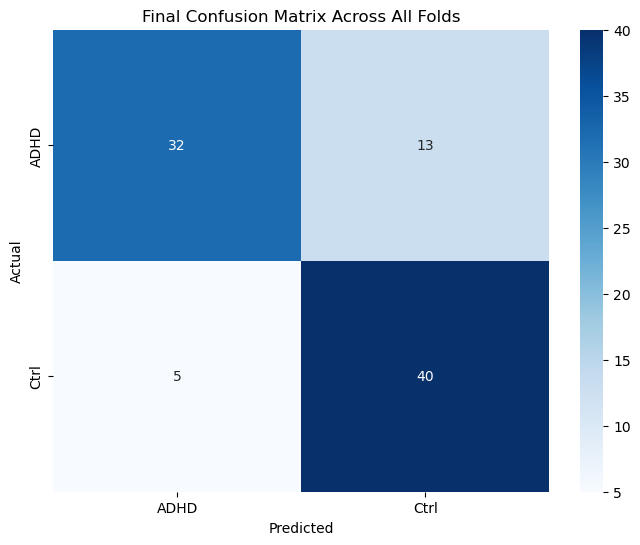


AUROC: 0.8311
Sensitivity (at optimal threshold 0.1585): 0.9556
Specificity (at optimal threshold 0.1585): 0.6444


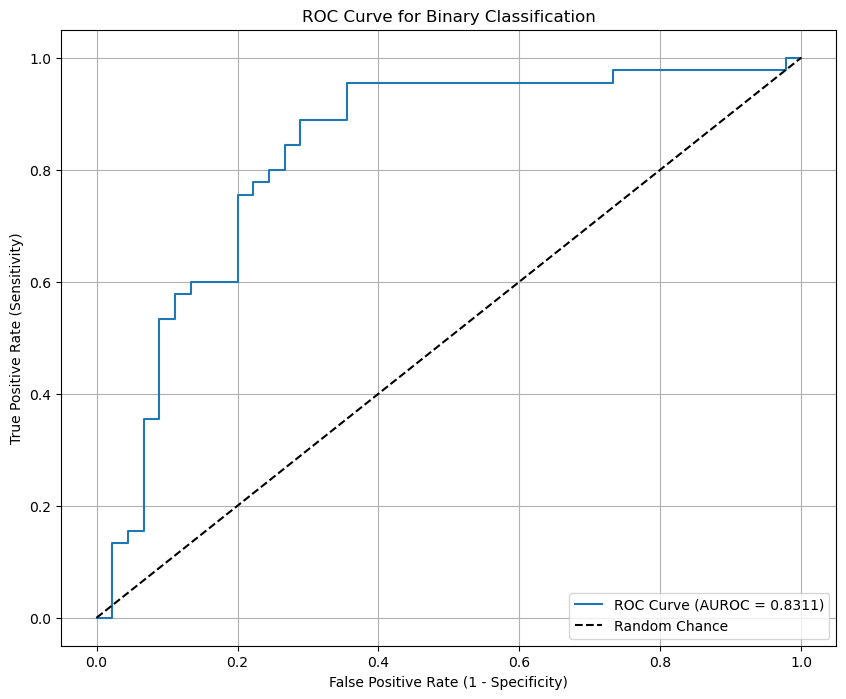

In [18]:
# Aggregate results
mean_accuracy = np.mean(fold_accuracies)

print(f"\nMean Accuracy: {mean_accuracy:.4f}")

# Compute the final confusion matrix
final_confusion_matrix = confusion_matrix(all_truths, all_predictions)

# Plot the final confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(final_confusion_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['ADHD', 'Ctrl'], 
            yticklabels=['ADHD', 'Ctrl'])
plt.title('Final Confusion Matrix Across All Folds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Compute ROC curve and AUROC
fpr, tpr, thresholds = roc_curve(all_truths, all_probabilities)
auroc = auc(fpr, tpr)

# Sensitivity and Specificity
optimal_idx = np.argmax(tpr - fpr)  # Optimal threshold index
optimal_threshold = thresholds[optimal_idx]
sensitivity = tpr[optimal_idx]
specificity = 1 - fpr[optimal_idx]

print(f"\nAUROC: {auroc:.4f}")
print(f"Sensitivity (at optimal threshold {optimal_threshold:.4f}): {sensitivity:.4f}")
print(f"Specificity (at optimal threshold {optimal_threshold:.4f}): {specificity:.4f}")

# Plot ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'ROC Curve (AUROC = {auroc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Binary Classification')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [19]:
# Save the final model
save_dir = '../Models/Full_dataset[remove_behavioral]/Final Models with ablation analysis'
os.makedirs(save_dir, exist_ok=True)

final_model = build_hybrid_model(input_shape=X_smote.shape[1:], nb_classes=2)
final_model.fit(X_smote, y_smote, epochs=200, batch_size=16, verbose=0)

h5_path = os.path.join(save_dir, 'CNN_LSTM_Attention_nogmm.h5') 
final_model.save(h5_path)
print(f"\nSaved model → {h5_path}")


Saved model → ../Models/Full_dataset[remove_behavioral]/Final Models with ablation analysis/CNN_LSTM_Attention_nogmm.h5


#### e. CNN-LSTM-GMM-Attention

66 66

--- Fold 1/10 ---
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
Fold 1 Accuracy: 0.6667

--- Fold 2/10 ---
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
Fold 2 Accuracy: 0.7778

--- Fold 3/10 ---
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
Fold 3 Accuracy: 1.0000

--- Fold 4/10 ---
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
Fold 4 Accuracy: 0.7778

--- Fold 5/10 ---
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
Fold 5 Accuracy: 1.0000

--- Fold 6/10 ---
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
Fold 6 Accuracy: 1.0000

--- Fold 7/10 ---
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s

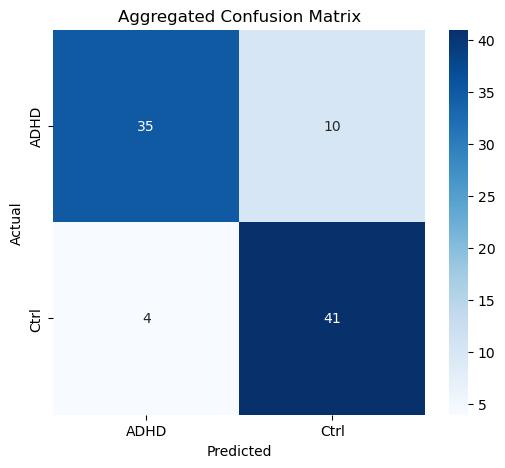


AUROC: 0.8857
Optimal threshold: 0.8435
Sensitivity: 0.9111
Specificity: 0.8000


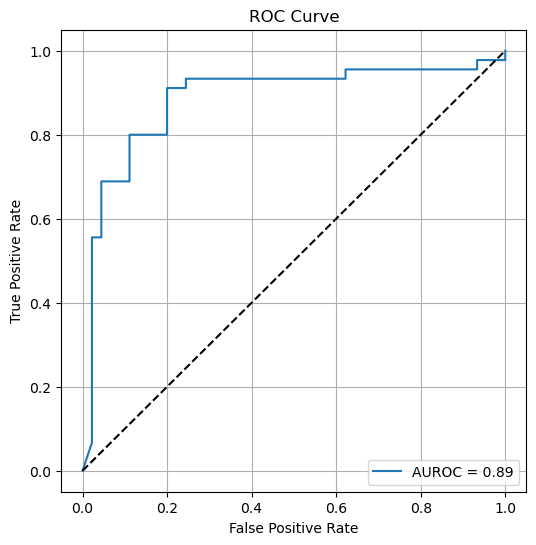

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv1D, BatchNormalization, Dropout, Flatten,
    Dense, LSTM, Attention, Concatenate
)
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (
    accuracy_score, confusion_matrix,
    roc_curve, auc
)

# Load and preprocess dataset
significant_df = pd.read_csv("../Data/full_dataset_without_behavioural_[2_class].csv", index_col=0)
subject_info = pd.read_csv('../../Full_dataset/Subject_info.csv')

# Remove the 52nd row in the features dataset
subject_info = subject_info.drop(index=51).reset_index(drop=True)

# Map group labels to integers
label_mapping = {'off-ADHD': 0, 'on-ADHD': 0, 'Ctrl': 1}
subject_info['GroupData'] = subject_info['GroupData'].replace(label_mapping)

# Extract features and labels
labels = subject_info['GroupData']
print(len(significant_df), len(labels))
assert len(significant_df) == len(labels), "Mismatch between features and labels."

# Handle missing values
significant_df = significant_df.fillna(significant_df.mean())

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(significant_df)
y = labels.values

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_smote, y_res = smote.fit_resample(X, y)

# Reshape for temporal modeling
X_res = X_smote.reshape((X_smote.shape[0], 1, X_smote.shape[1]))

def build_hybrid_model(input_shape, nb_classes, n_gmm_clusters):
    ts_input  = Input(shape=input_shape,      name="ts_input")
    gmm_input = Input(shape=(n_gmm_clusters,), name="gmm_input")

    # CNN branch → 128-D feature
    c = Conv1D(64, 3, padding='same', activation='relu')(ts_input)
    c = BatchNormalization()(c)
    c = Dropout(0.3)(c)
    c = Conv1D(128, 3, padding='same', activation='relu')(c)
    c = BatchNormalization()(c)
    c = Dropout(0.3)(c)
    c = Flatten()(c)
    cnn_feats = Dense(128, activation='relu', name='cnn_feats')(c)

    # LSTM+Attention branch → 64-D feature
    l = LSTM(64, return_sequences=True, activation='tanh')(ts_input)
    l = BatchNormalization()(l)
    l = LSTM(128, return_sequences=True, activation='tanh')(l)
    l = BatchNormalization()(l)
    l = Dropout(0.3)(l)
    attn = Attention(name='self_attention')([l, l])
    l = LSTM(32, return_sequences=False, activation='tanh')(attn)
    l = BatchNormalization()(l)
    l = Dropout(0.3)(l)
    lstm_feats = Dense(64, activation='relu', name='lstm_feats')(l)

    # concatenate [cnn_feats, GMM-probs, lstm_feats]
    merged = Concatenate(name='feature_concat')([cnn_feats, gmm_input, lstm_feats])
    x = Dense(64, activation='relu')(merged)
    outputs = Dense(nb_classes, activation='softmax', name='classifier')(x)

    model = Model([ts_input, gmm_input], outputs, name='HybridCNN_LSTM_GMM')
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


n_splits = 10
n_gmm_clusters = 2
skf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

fold_accs = []
all_preds = []
all_trues = []
all_probs = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X_res, y_res), start=1):
    print(f"\n--- Fold {fold}/{n_splits} ---")
    X_train, X_test = X_res[train_idx], X_res[test_idx]
    y_train, y_test = y_res[train_idx], y_res[test_idx]

    # a) build fresh model
    model = build_hybrid_model(
        input_shape=(X_train.shape[1], X_train.shape[2]),
        nb_classes=2,
        n_gmm_clusters=n_gmm_clusters
    )

    # b) extract CNN features (offline step)
    feat_extractor = Model(inputs=model.input[0],
                           outputs=model.get_layer('cnn_feats').output)
    feats_train = feat_extractor.predict(X_train, batch_size=16)
    feats_test  = feat_extractor.predict(X_test,  batch_size=16)

    # c) fit GMM & get posteriors
    gmm = GaussianMixture(n_components=n_gmm_clusters, random_state=42)
    gmm.fit(feats_train)
    probs_train = gmm.predict_proba(feats_train)
    probs_test  = gmm.predict_proba(feats_test)

    # d) train hybrid model on [X, GMM-probs]
    model.fit(
        [X_train, probs_train], y_train,
        epochs=250, batch_size=16, verbose=0
    )

    # e) evaluate
    y_prob = model.predict([X_test, probs_test])
    y_pred = np.argmax(y_prob, axis=1)

    acc = accuracy_score(y_test, y_pred)
    print(f"Fold {fold} Accuracy: {acc:.4f}")
    fold_accs.append(acc)

    all_preds.extend(y_pred)
    all_trues.extend(y_test)
    all_probs.extend(y_prob[:, 1])


# --- 4) AGGREGATED METRICS & PLOTS ---
mean_acc = np.mean(fold_accs)
print(f"\nMean CV Accuracy: {mean_acc:.4f}")

# Confusion matrix
cm = confusion_matrix(all_trues, all_preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['ADHD','Ctrl'],
            yticklabels=['ADHD','Ctrl'])
plt.title('Aggregated Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC & AUROC
fpr, tpr, thresholds = roc_curve(all_trues, all_probs)
roc_auc = auc(fpr, tpr)
opt_idx = np.argmax(tpr - fpr)
opt_thresh = thresholds[opt_idx]
sensitivity = tpr[opt_idx]
specificity = 1 - fpr[opt_idx]

print(f"\nAUROC: {roc_auc:.4f}")
print(f"Optimal threshold: {opt_thresh:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'AUROC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [22]:
import os

In [25]:
# Save the final model
save_dir = '../Models/Full_dataset[remove_behavioral]/Final Models with ablation analysis'
os.makedirs(save_dir, exist_ok=True)

h5_path = os.path.join(save_dir, 'CNN_LSTM_GMM_Attention.h5') 
model.save(h5_path)
print(f"\nSaved model → {h5_path}")


Saved model → ../Models/Full_dataset[remove_behavioral]/Final Models with ablation analysis/CNN_LSTM_GMM_Attention.h5


In [19]:
print(fpr)
print(tpr)
print(auroc)

[0.         0.02222222 0.02222222 0.02222222 0.02222222 0.02222222
 0.04444444 0.04444444 0.11111111 0.11111111 0.2        0.2
 0.24444444 0.24444444 0.62222222 0.62222222 0.93333333 0.93333333
 1.         1.        ]
[0.         0.06666667 0.15555556 0.37777778 0.42222222 0.55555556
 0.55555556 0.68888889 0.68888889 0.8        0.8        0.91111111
 0.91111111 0.93333333 0.93333333 0.95555556 0.95555556 0.97777778
 0.97777778 1.        ]
0.8891358024691358


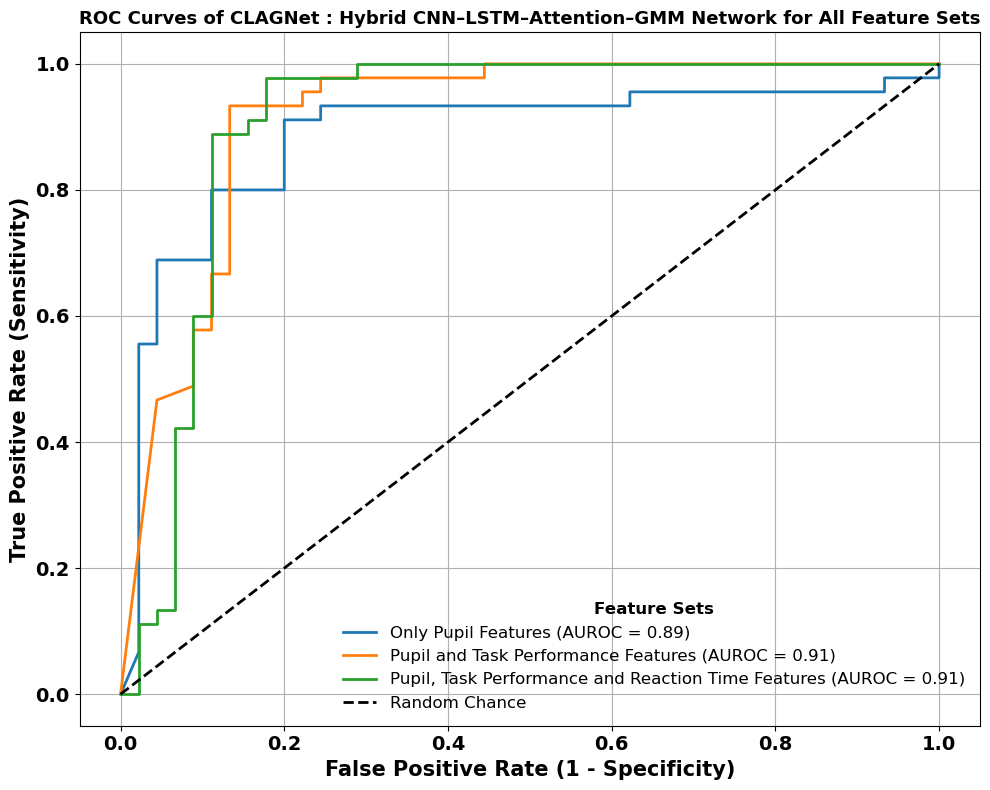

In [30]:
# Notebook 1 (e.g. Transformer):
fpr_model1 = [0. ,        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222
, 0.04444444 ,0.04444444 ,0.11111111 ,0.11111111 ,0.2        ,0.2
, 0.24444444 ,0.24444444 ,0.62222222 ,0.62222222 ,0.93333333 ,0.93333333
, 1.,         1.        ]  # numpy array of false-positive rates from roc_curve
tpr_model1 = [0.       ,  0.06666667, 0.15555556 ,0.37777778 ,0.42222222, 0.55555556
 ,0.55555556, 0.68888889 ,0.68888889, 0.8        ,0.8        ,0.91111111
, 0.91111111 ,0.93333333 ,0.93333333, 0.95555556 ,0.95555556 ,0.97777778
, 0.97777778 ,1.        ]   # numpy array of true-positive rates from roc_curve
auroc_model1 = 0.89  # float from roc_auc_score

# Notebook 2 (e.g. LSTM):
fpr_model2 = [0.0,0.044444444444444446,0.08888888888888889,0.08888888888888889,0.08888888888888889,0.1111111111111111,0.1111111111111111,0.13333333333333333,0.13333333333333333,0.2222222222222222,0.2222222222222222,0.24444444444444444,0.24444444444444444,0.4444444444444444,0.4444444444444444,1.0]
tpr_model2 = [0.0,0.4666666666666667,0.4888888888888889,0.5111111111111111,0.5777777777777777,0.5777777777777777,0.6666666666666666,0.6666666666666666,0.9333333333333333,0.9333333333333333,0.9555555555555556,0.9555555555555556,0.9777777777777777,0.9777777777777777,1.0,1.0]
auroc_model2 = 0.91

# Notebook 3 (e.g. ConvLSTM):
fpr_model3 = [0.0,0.022222222222222223,0.022222222222222223,0.022222222222222223,0.022222222222222223,0.044444444444444446,0.044444444444444446,0.06666666666666667,0.06666666666666667,0.06666666666666667,0.06666666666666667,0.08888888888888889,0.08888888888888889,0.1111111111111111,0.1111111111111111,0.15555555555555556,0.15555555555555556,0.17777777777777778,0.17777777777777778,0.28888888888888886,0.28888888888888886,1.0]
tpr_model3 = [0.0,0.0,0.022222222222222223,0.08888888888888889,0.1111111111111111,0.1111111111111111,0.13333333333333333,0.13333333333333333,0.17777777777777778,0.2222222222222222,0.4222222222222222,0.4222222222222222,0.6,0.6,0.8888888888888888,0.8888888888888888,0.9111111111111111,0.9111111111111111,0.9777777777777777,0.9777777777777777,1.0,1.0]
auroc_model3 = 0.91

# plus your styling constants:
TITLE_FS        = 13
LABEL_FS        = 15
TICK_FS         = 14
LEGEND_FS       = 12
LEGEND_TITLE_FS = 12

# (optionally) a list of model names for your legend:
model_names = ['Only Pupil Features','Pupil and Task Performance Features','Pupil, Task Performance and Reaction Time Features']

plt.figure(figsize=(10, 8))

plt.plot(fpr_model1, tpr_model1, lw=2,
         label=f'{model_names[0]} (AUROC = {auroc_model1:.2f})')
plt.plot(fpr_model2, tpr_model2, lw=2,
         label=f'{model_names[1]} (AUROC = {auroc_model2:.2f})')
plt.plot(fpr_model3, tpr_model3, lw=2,
         label=f'{model_names[2]} (AUROC = {auroc_model3:.2f})')

# Random chance line
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Chance')

# Titles & labels
plt.title('ROC Curves of CLAGNet : Hybrid CNN–LSTM–Attention–GMM Network for All Feature Sets', fontsize=TITLE_FS, fontweight='bold')
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=LABEL_FS, fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=LABEL_FS, fontweight='bold')

# Ticks
plt.xticks(fontsize=TICK_FS, fontweight='bold')
plt.yticks(fontsize=TICK_FS, fontweight='bold')

# Legend
leg = plt.legend(loc='lower right',
                 title='Feature Sets',
                 fontsize=LEGEND_FS,
                 title_fontsize=LEGEND_TITLE_FS,
                 frameon=False)
leg.get_title().set_fontweight('bold')

# Grid & layout
plt.grid(True)
plt.tight_layout()

plt.show()